PARCIAL III CLASE DEL 14 DE MAYO DE 2024

In [121]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#IMPORTAR LIBRERIAS Y MODELO DE ARBOL DE DECISION
import pandas as pd
from sklearn import tree

In [2]:
data = pd.read_csv("ObesityDataset_raw_and_data_sinthetic.csv")
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# reviso las cols no numéricas
print("Gender:", data.Gender.unique())
print("CALC:", data.CALC.unique())
print("SCC:", data.SCC.unique())
print("MTRANS:", data.MTRANS.unique())
print("FAMYLY:", data.family_history_with_overweight.unique())
print("FAVC:", data.FAVC.unique())
print("CAEC:", data.CAEC.unique())
print("SMOKE:", data.SMOKE.unique())
print("NObeyesdad", data.NObeyesdad.unique())


Gender: ['Female' 'Male']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
SCC: ['no' 'yes']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
FAMYLY: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
NObeyesdad ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [4]:
# codificación de variables
Gender_labels = {'Female': 0, 'Male': 1}
CALC_labels = {'no': 0, 'sometimes': 1, 'Frequenty': 2, 'Always':3} # notar cómo respeto el orden
SMOKE_labels = {'no': 0, 'yes': 1}
SCC_labels = {'no': 0, 'yes': 1}
FAVC_labels = {'no': 0, 'yes': 1}
CAEC_labels = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
family_history_with_overweight_labels = {'no': 0, 'yes': 1}
MTRANS_labels = {'Public_Transportation': 0, 'Automobile': 1, 'Motorbike': 2, 'Bike': 3, 'Walking': 4}
NObeyesdad_labels = dict(zip(data.NObeyesdad.unique(), range(data.NObeyesdad.nunique())))

NObeyesdad_labels

{'Normal_Weight': 0,
 'Overweight_Level_I': 1,
 'Overweight_Level_II': 2,
 'Obesity_Type_I': 3,
 'Insufficient_Weight': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6}

In [5]:
# codifico
data.NObeyesdad = data.NObeyesdad.map(NObeyesdad_labels)
data.Gender = data.Gender.map(Gender_labels)
data.MTRANS = data.MTRANS.map(MTRANS_labels)
data.family_history_with_overweight = data.family_history_with_overweight.map(family_history_with_overweight_labels)
data.FAVC = data.FAVC.map(FAVC_labels)
data.CAEC = data.CAEC.map(CAEC_labels)
data.SCC = data.SCC.map(SCC_labels)
data.CALC = data.CALC.map(CALC_labels)
data.SMOKE = data.SMOKE.map(SMOKE_labels)

In [6]:
data.head()
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,0.0,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,1,0,0
1,21.000000,0,1.520000,56.000000,NaN,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0
2,23.000000,1,1.800000,77.000000,NaN,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,1,0,0
3,27.000000,1,1.800000,87.000000,NaN,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,4,1
4,22.000000,1,1.780000,89.800000,NaN,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,NaN,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,1,0,6
2107,21.982942,0,1.748584,133.742943,NaN,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,1,0,6
2108,22.524036,0,1.752206,133.689352,NaN,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,1,0,6
2109,24.361936,0,1.739450,133.346641,NaN,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,1,0,6


In [278]:
arbol = tree.DecisionTreeClassifier()
arbol

DecisionTreeClassifier()

In [279]:
X = data.drop("NObeyesdad", axis=1)
X.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,21.0,0,1.62,64.0,0.0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,1,0
1,21.0,0,1.52,56.0,NaN,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0
2,23.0,1,1.80,77.0,NaN,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,0
3,27.0,1,1.80,87.0,NaN,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,4
4,22.0,1,1.78,89.8,NaN,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0


In [280]:
y = data["NObeyesdad"]
y.head()

0    0
1    0
2    0
3    1
4    2
Name: NObeyesdad, dtype: int64

In [281]:
# dividimos los datos usando la función de sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [133]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [134]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
arbol.score(X_test, y_test)

0.9132492113564669

In [136]:
from sklearn.ensemble import RandomForestClassifier

arboles = RandomForestClassifier(n_estimators=500, max_depth=3, n_jobs=-1)
arboles.fit(X_train, y_train)

arboles.score(X_test, y_test)

0.7034700315457413

In [137]:
arboles.feature_importances_

array([8.46738142e-02, 1.11280598e-01, 3.95425560e-02, 3.96062198e-01,
       4.87480540e-03, 2.62399307e-03, 1.49516948e-01, 3.93474483e-02,
       1.27418568e-04, 1.16080606e-04, 1.50389631e-02, 5.86784301e-02,
       1.39421145e-02, 2.10832676e-02, 5.35902597e-02, 9.50110564e-03])

In [138]:
arbol.feature_importances_

array([4.25372034e-02, 1.63784211e-01, 2.57589907e-01, 4.42763718e-01,
       0.00000000e+00, 2.06936700e-02, 1.38061948e-02, 1.06428530e-02,
       1.05469075e-03, 3.72243794e-04, 5.61516290e-03, 2.87073638e-03,
       6.93034065e-03, 7.88805982e-03, 1.77045548e-02, 5.74645437e-03])

In [139]:
arboles.estimators_[:10]

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=166632063),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2085314430),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2062244976),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1441020109),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1135688862),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=580425353),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=352857084),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=158222957),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=400316630),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1506310772)]

In [140]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
#CLUSTERIZACION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('Credit Card Customer Data.csv')
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [23]:
from sklearn.preprocessing import normalize
data_norm = normalize(data)
valor_norm = data_norm.max()
valor_norm


0.9986307203749057

In [20]:
from sklearn.preprocessing import normalize

data_norm = normalize (data)
data_norm = pd.DataFrame (data_norm, columns = data.columns) #Creamos un dataframe solo para visualizacion
data_norm


Sl_No                  0.022894
Customer Key           0.998631
Avg_Credit_Limit       0.997082
Total_Credit_Cards     0.000480
Total_visits_bank      0.000343
Total_visits_online    0.000355
Total_calls_made       0.000576
dtype: float64

In [21]:

valor_norm = data_norm.max()
valor_norm

Sl_No                  0.022894
Customer Key           0.998631
Avg_Credit_Limit       0.997082
Total_Credit_Cards     0.000480
Total_visits_bank      0.000343
Total_visits_online    0.000355
Total_calls_made       0.000576
dtype: float64

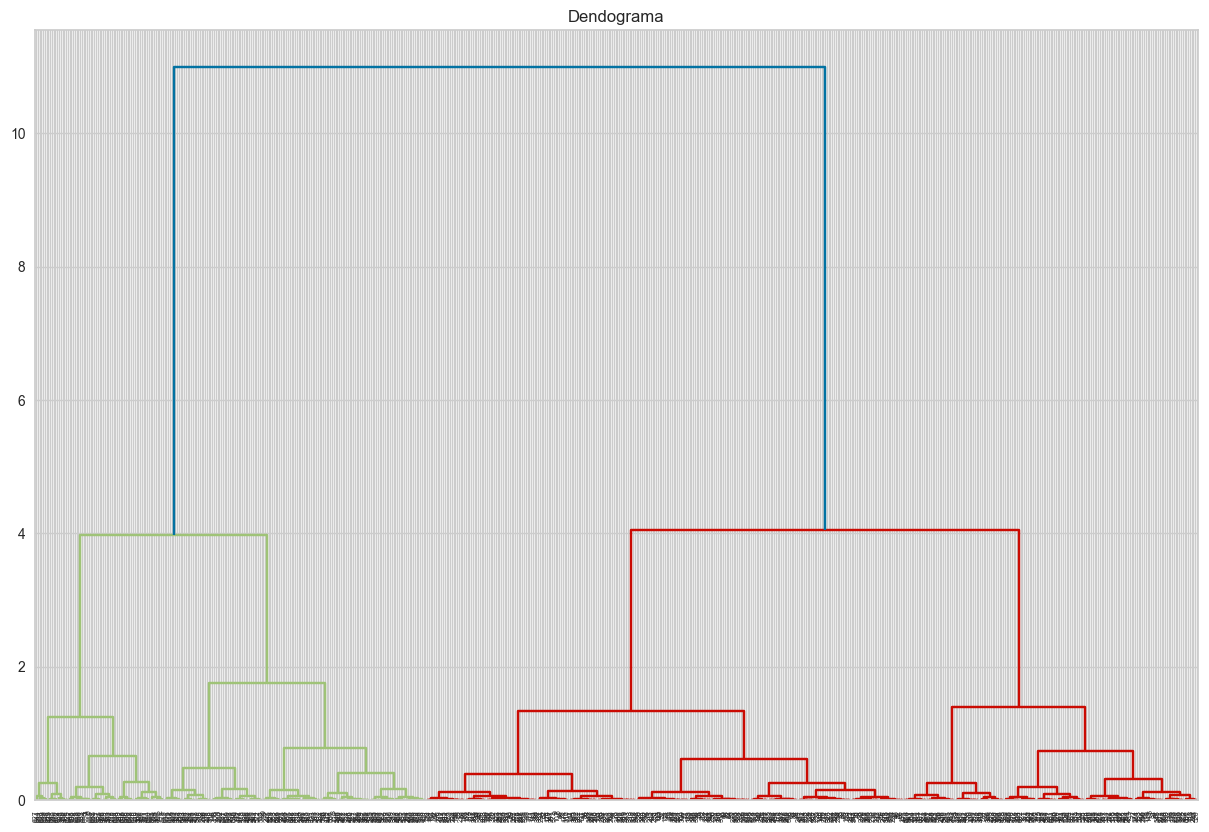

In [144]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15,10))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_norm, method='ward'))

In [145]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')

In [146]:
clusters.fit_predict(data_norm)

array([0, 0, 3, 0, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [147]:
data['Cluster'] = clusters.labels_
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,3
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,3
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,3
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,3
658,659,80655,172000,10,1,15,0,3


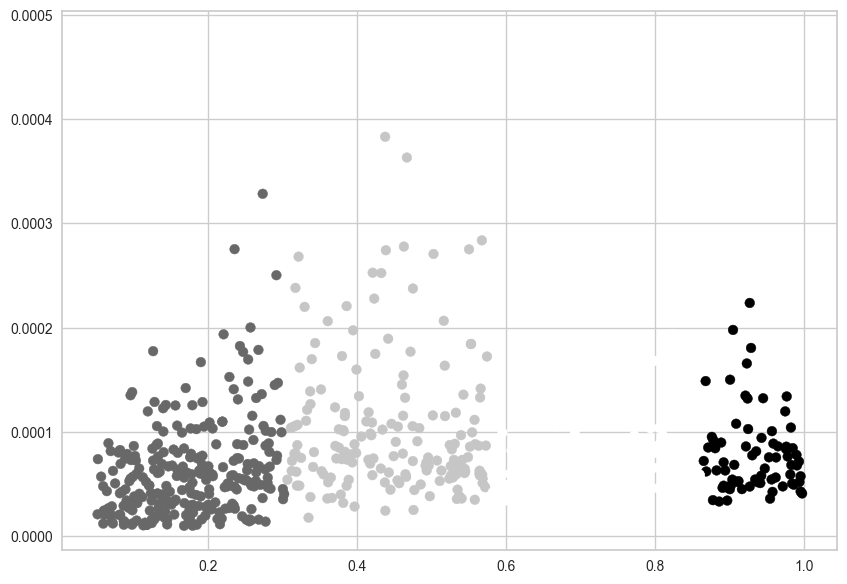

In [148]:
#VISUALIZACION DE LOS DATOS
plt.figure(figsize=(10,7))
plt.scatter(data_norm['Avg_Credit_Limit'], data_norm['Total_Credit_Cards'], c=clusters.labels_)

In [149]:
from sklearn import tree
model_params={
        'decision tree': {
        'model':tree.DecisionTreeClassifier(),
        'params':{
            'max_depth':[5, 10],
            'min_samples_split':[10,50],
            'min_samples_leaf':[10,50],
            'criterion':['gini','entropy']
        }
    }
}

In [150]:
inputs=data_norm
target=np.array(data['Cluster'])

In [151]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

train inputs (528, 7)
train targets (528,)
test inputs (132, 7)
test targtet (132,)


In [152]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)

    clf.fit(train_inputs, train_target)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [153]:
df_score=pd.DataFrame(score,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,decision tree,1.0,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [154]:
Tree=tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10, min_samples_split=101).fit(train_inputs, train_target)

In [155]:
from sklearn.metrics import accuracy_score
pred = Tree.predict(test_inputs)
accuracy_score(test_target, pred)

0.8560606060606061


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 16.4/16.4 MB 3.2 MB/s eta 0:00:00


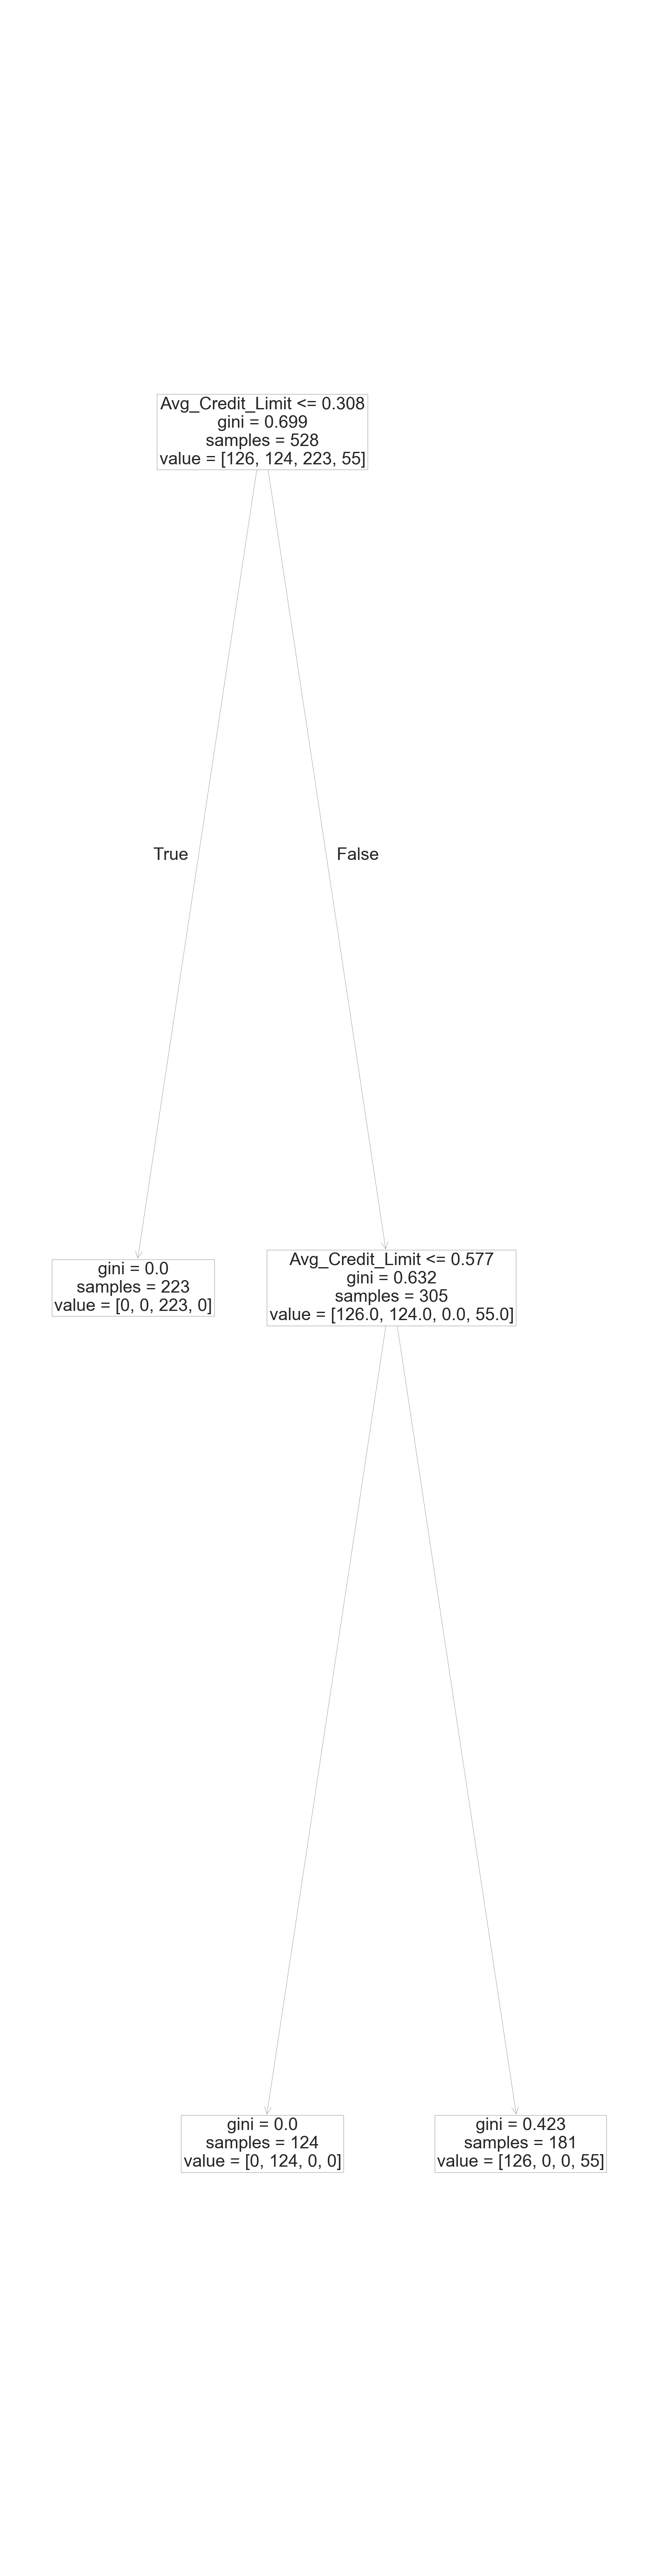

In [156]:
plt.figure(figsize=(20, 80))
tree.plot_tree(Tree, fontsize= 30, feature_names=list(inputs.columns))
plt.show()

In [157]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [158]:
x, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [159]:
x

array([[ -3.38426057,   5.22173974],
       [ -1.83623836,  -7.73538367],
       [ -7.45617621,   6.19887436],
       [ -1.78504307,   1.60974874],
       [-10.1249098 ,   6.1338052 ],
       [  1.0146433 ,   4.0453507 ],
       [ -0.70092735,  -6.98196818],
       [  8.99757441,  -2.30228718],
       [ -7.9192539 ,   5.72225675],
       [  1.9445622 ,  -7.43742299],
       [ -0.93442649,  -7.78820426],
       [ 11.48819121,   1.33719026],
       [ -2.86067816, -11.24623446],
       [ -7.90577233,   4.84553865],
       [ -2.24228315,   4.38550238],
       [  0.56928691, -10.0571088 ],
       [  0.6237701 ,  -6.12033956],
       [  8.32594634,   0.04535295],
       [ -2.11937574, -10.1833945 ],
       [ -6.70767333,   5.26896209],
       [ -2.52855036,   5.03085908],
       [ -8.19937429,   4.07185131],
       [ -8.86097416,   7.62744807],
       [  0.25552915, -12.26658908],
       [  7.09274235,   1.13571881],
       [ -8.51922024,   4.14769715],
       [  9.58876813,  -2.81738008],
 

In [160]:
y

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

In [161]:
df_blobls = pd.DataFrame({
    'x1': x[:,0],
    'x2':x[:,1],
    'y':y

})

In [162]:
df_blobls

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [163]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind='scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Santiago HG\AppData\Local\Programs\Python

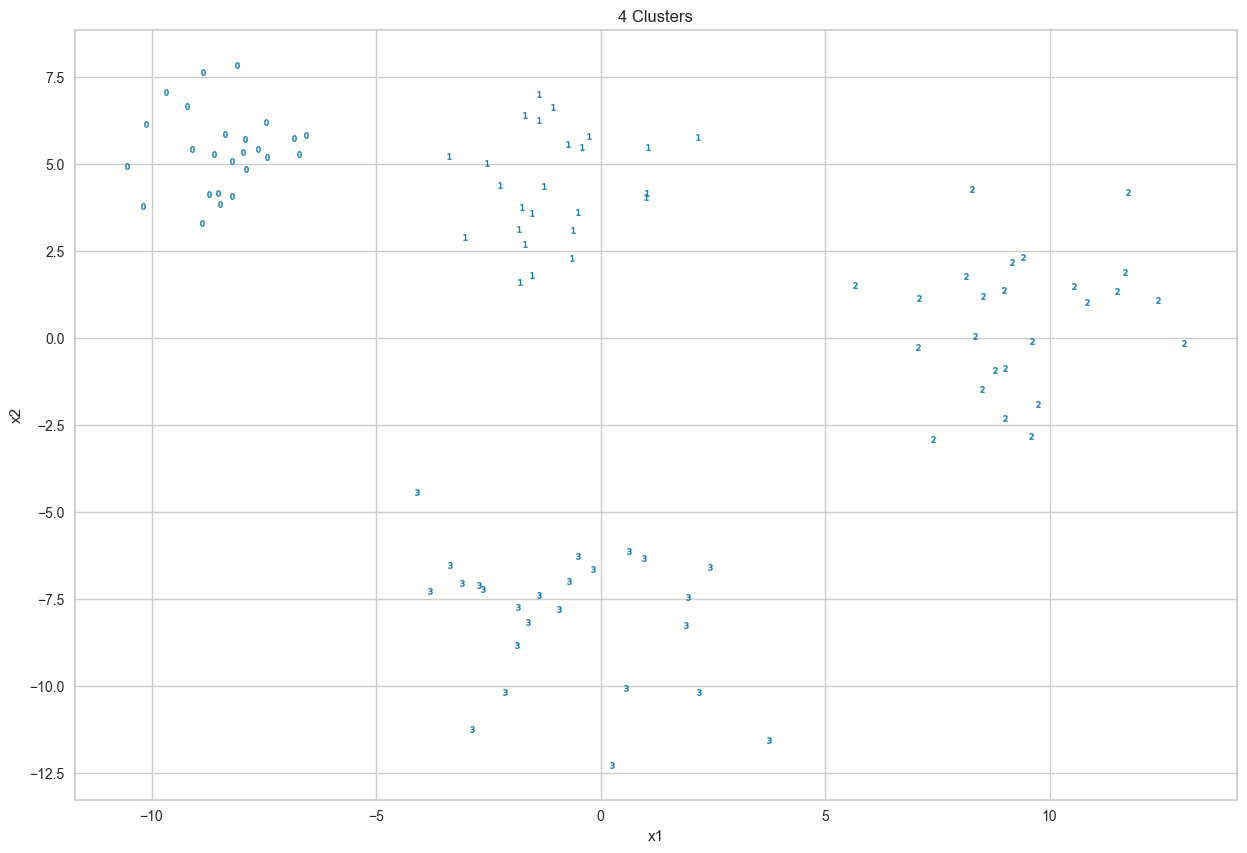

In [164]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x, y = df_blobls[['x1','x2']], df_blobls['y']
plot_2d_clusters(x,y,ax)

In [165]:
from sklearn.cluster import KMeans

In [166]:
kmeans = KMeans(n_clusters=5, random_state=7)

In [167]:
y_pred = kmeans.fit_predict(x)

In [168]:
y_pred

array([2, 3, 1, 2, 1, 2, 3, 0, 1, 3, 3, 4, 3, 1, 2, 3, 3, 0, 3, 1, 2, 1,
       1, 3, 0, 1, 0, 0, 3, 2, 3, 3, 2, 3, 3, 1, 0, 1, 2, 1, 3, 2, 2, 4,
       2, 0, 1, 1, 4, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 4, 1, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 4, 0, 4, 4, 3, 2, 2, 2, 1, 3, 0, 3, 4, 1,
       1, 2, 3, 2, 1, 3, 4, 0, 3, 2, 1, 2])

c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Santiago HG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(
c:\Users\Santiago HG\AppData\Local\Programs\Python

Text(0.5, 1.0, 'Kmeans 5 Clusters')

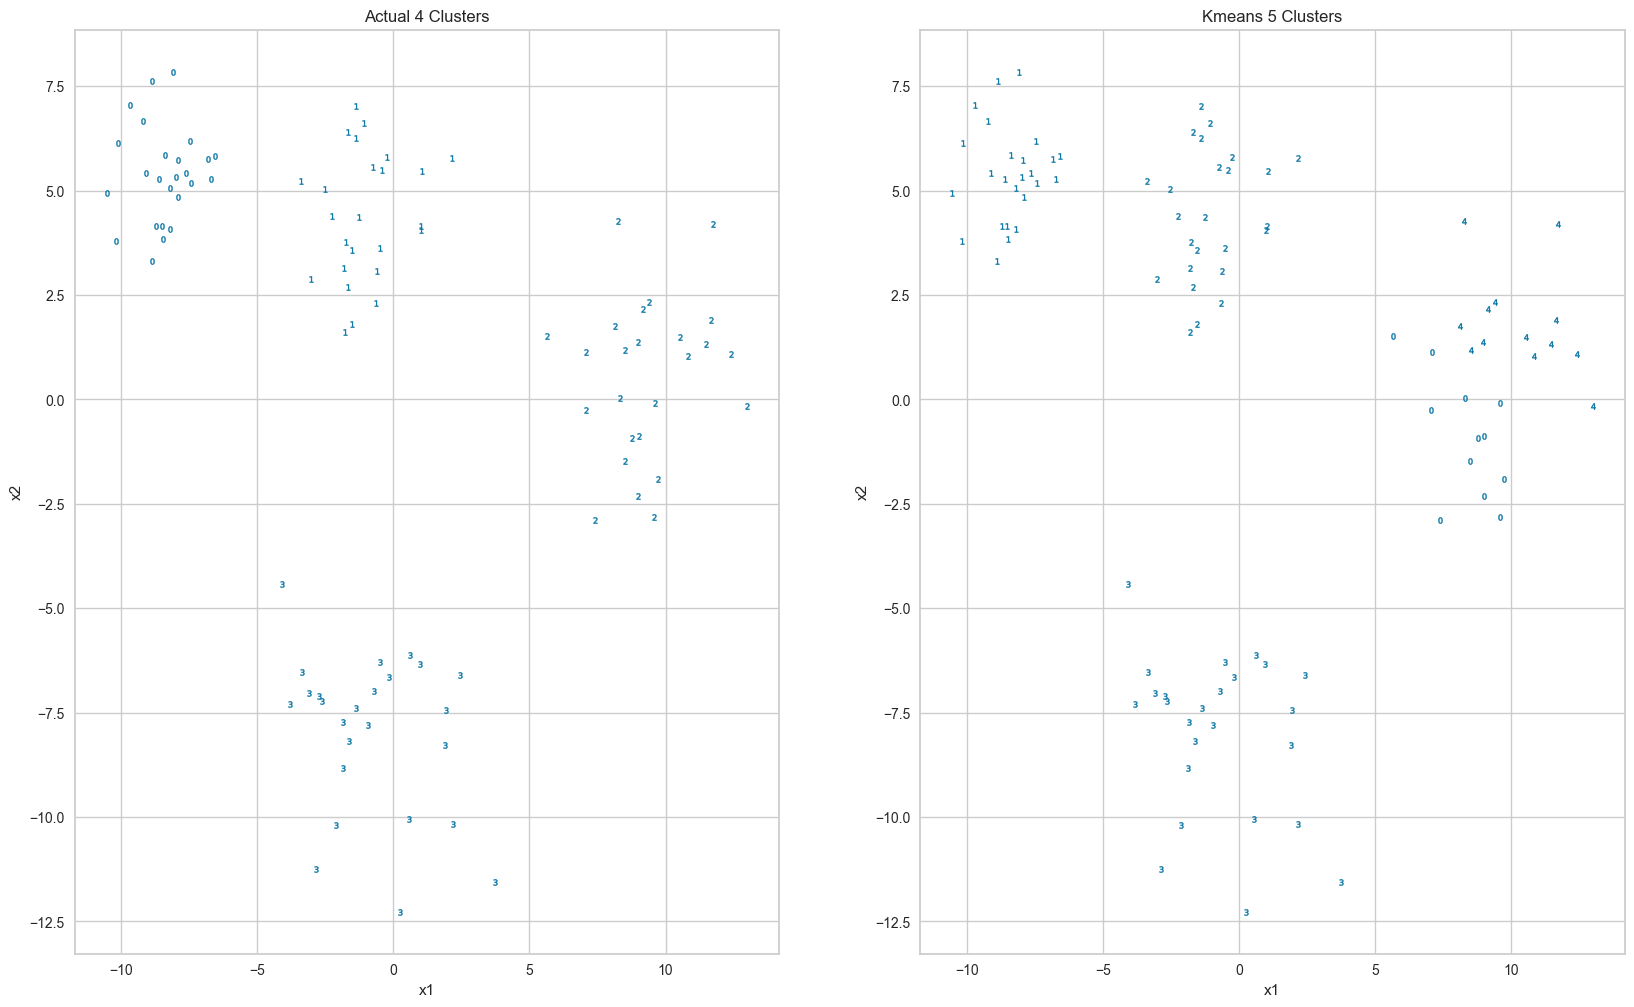

In [169]:
fig, axs = plt.subplots(1,2, figsize=(20,12))
plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f'Actual {axs[0].get_title()}')
axs[1].set_title(f'Kmeans {axs[1].get_title()}')

In [170]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates['new_template'] = go.layout.Template()
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}
pio.templates['new_template']['layout']['paper_bgcolor'] = 'black'
pio.templates['new_template']['layout']['plot_bgcolor'] = 'black'
pio.templates['new_template']['layout']['xaxis'] = {'title_standoff': 10, 'linecolor': 'black', 'mirror': True, 'gridcolor': '#EEEEEE'}
pio.templates['new_template']['layout']['yaxis'] = {'title_standoff': 10, 'linecolor': 'black', 'mirror': True, 'gridcolor': '#EEEEEE'}
pio.templates['new_template']['layout']['legend_bgcolor'] = 'rgb(117, 112, 179)'
pio.templates['new_template']['layout']['height'] = 700
pio.templates['new_template']['layout']['width'] = 1000
pio.templates['new_template']['layout']['autosize'] = False

pio.templates.default = 'new_template'

In [172]:
import plotly.graph_objects as go
import plotly.express as px


def graficar_clusters_plotly(x,y, color, show=True):
    global fig1
    fig1 = go.Figure()
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        fig1.add_traces(data=px.scatter(x=x[y==_][:,0], y=x[y==_][:,1],opacity=0.8, color_discrete_sequence=[color[_]]).data)

    fig1.update_layout(showlegend=True)
    fig1.show()

In [173]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [174]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
#NUEVA CLUSTERIZACION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [176]:
%pip install yellowbrick


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

In [178]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)

In [179]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

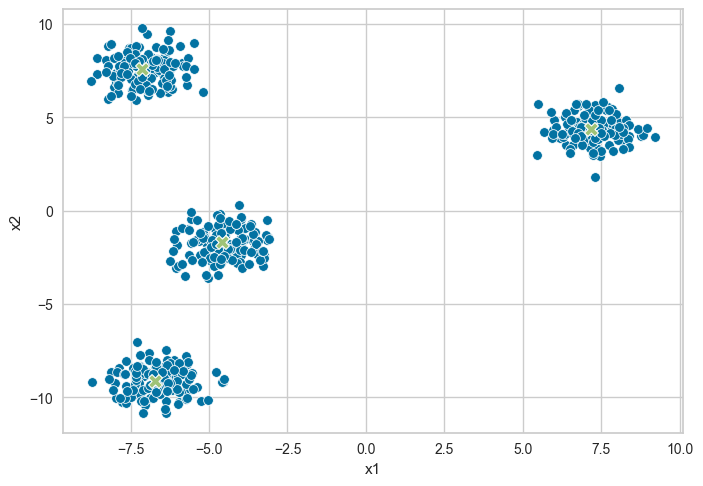

In [180]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

In [181]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]

    }
)

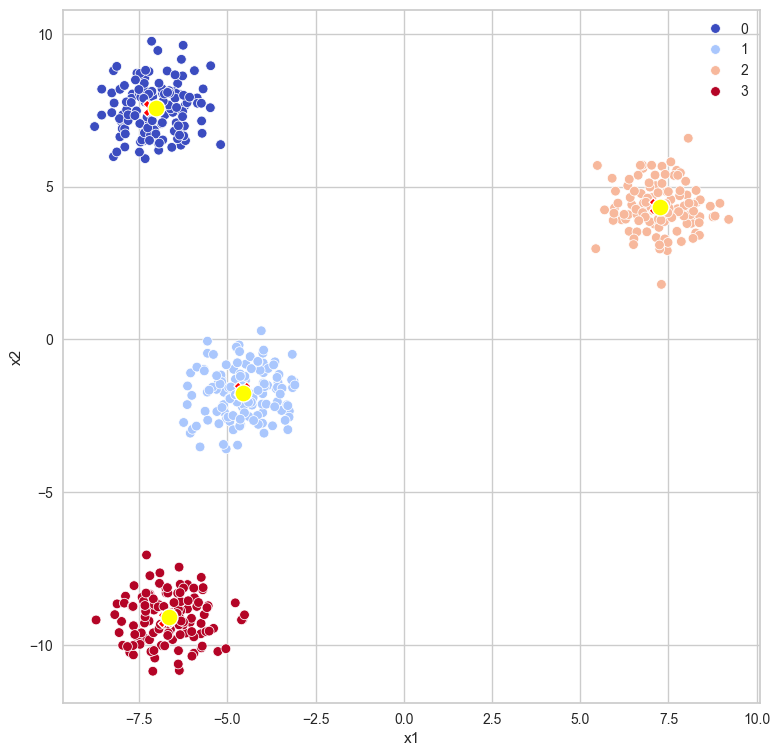

In [182]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()

In [183]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


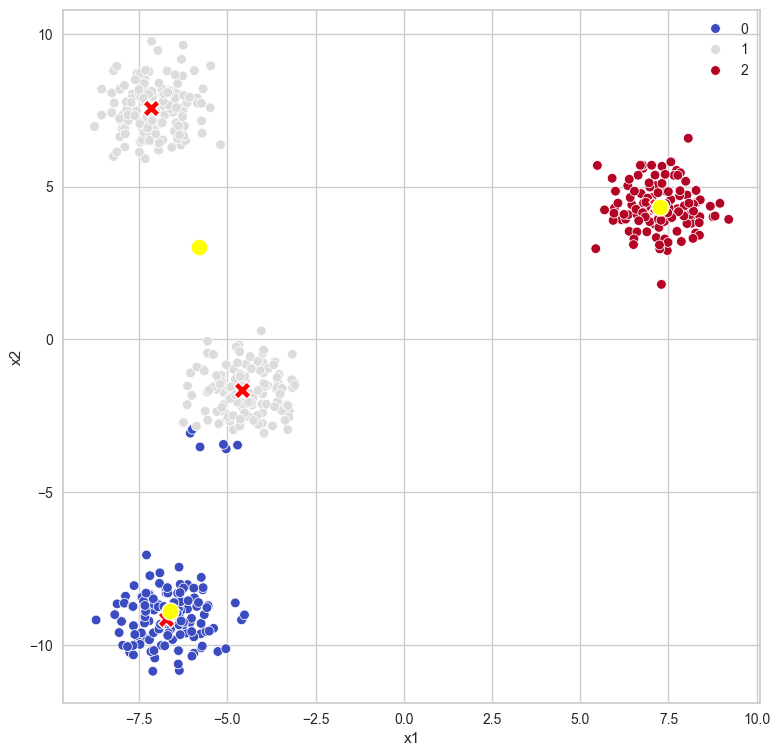

4


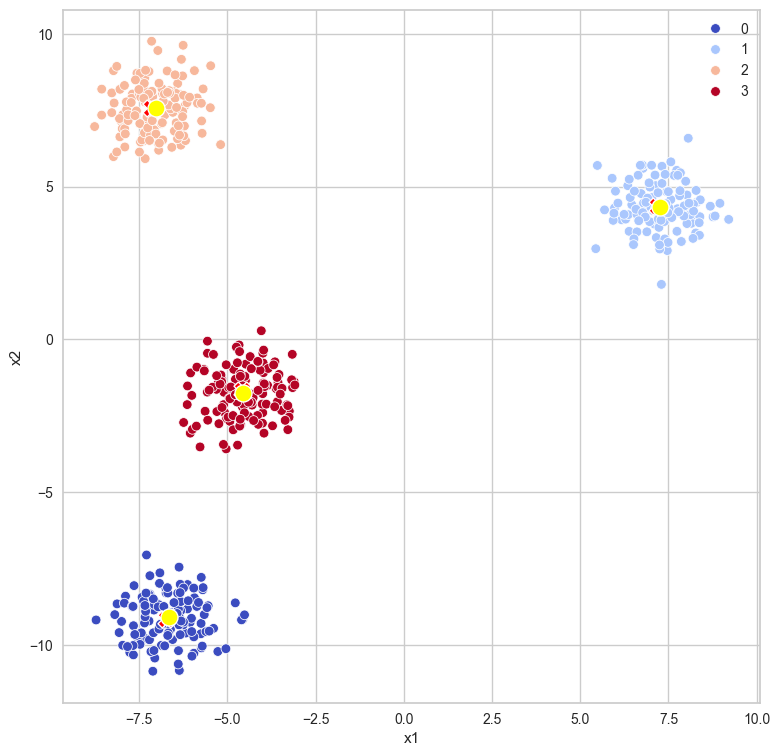

5


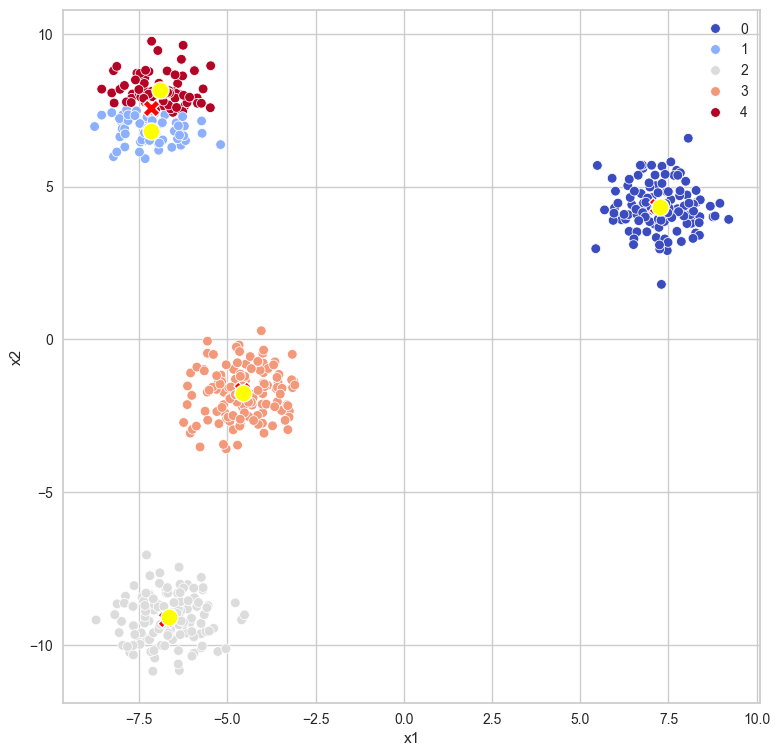

6


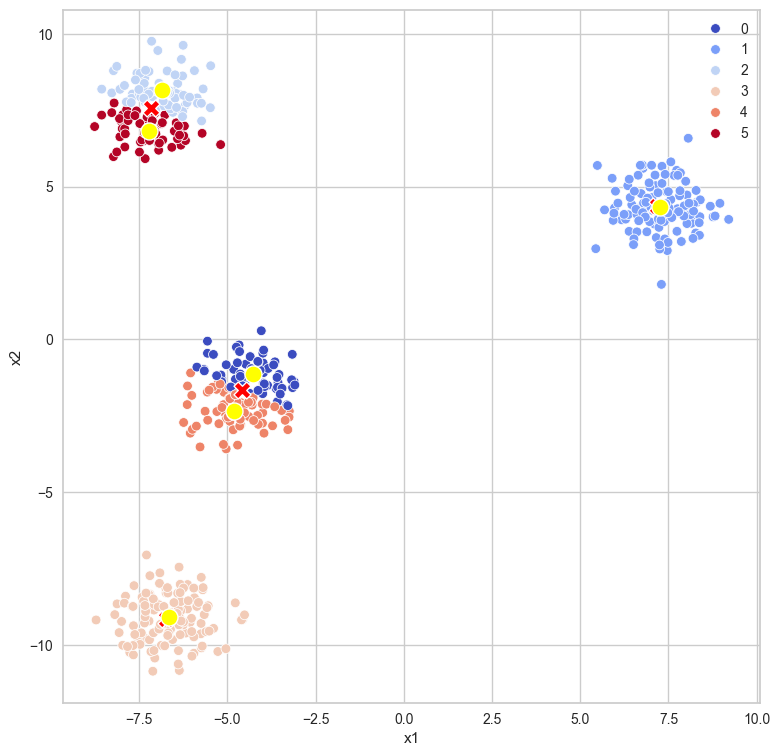

In [184]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

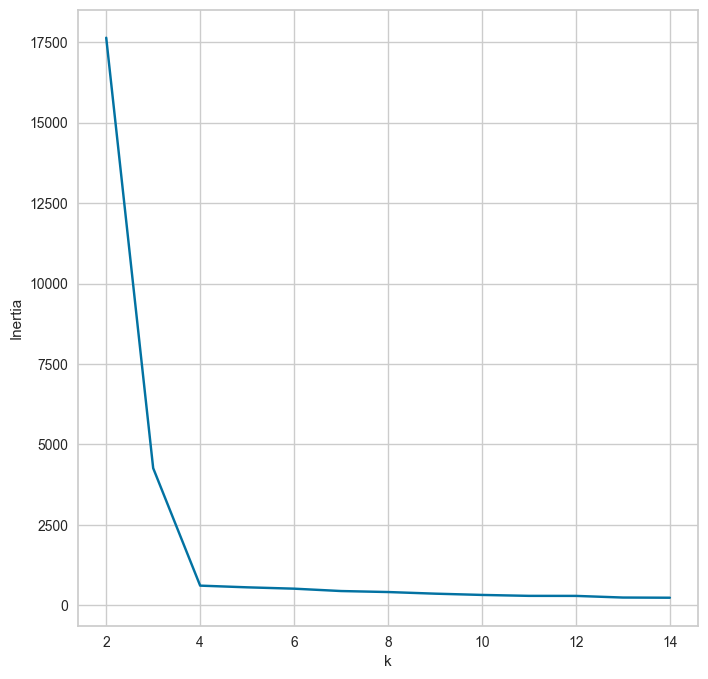

In [185]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

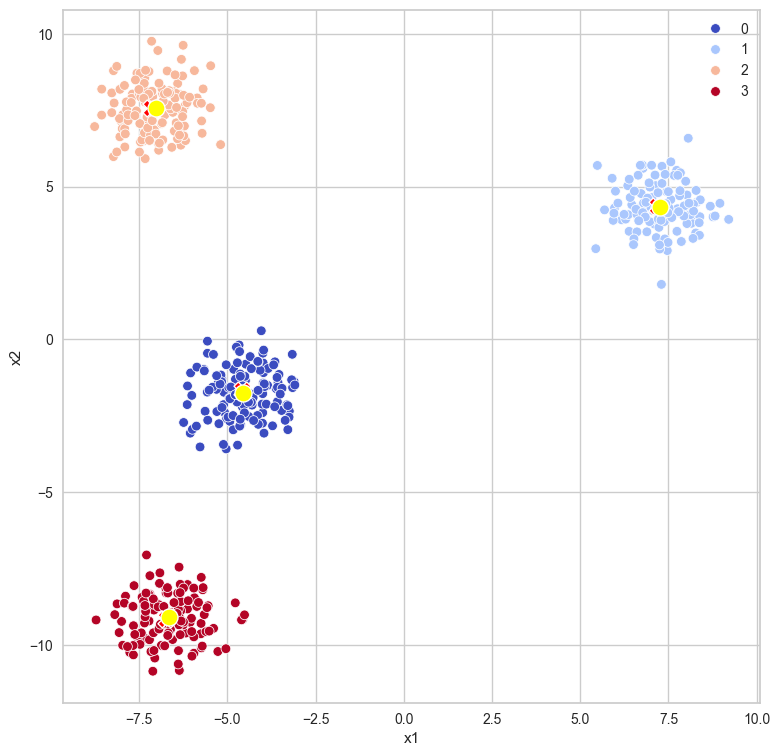

In [186]:
vis_cluster(4)

In [187]:
#HIERARCHICAL O JERARQUICO CLUSTER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [188]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

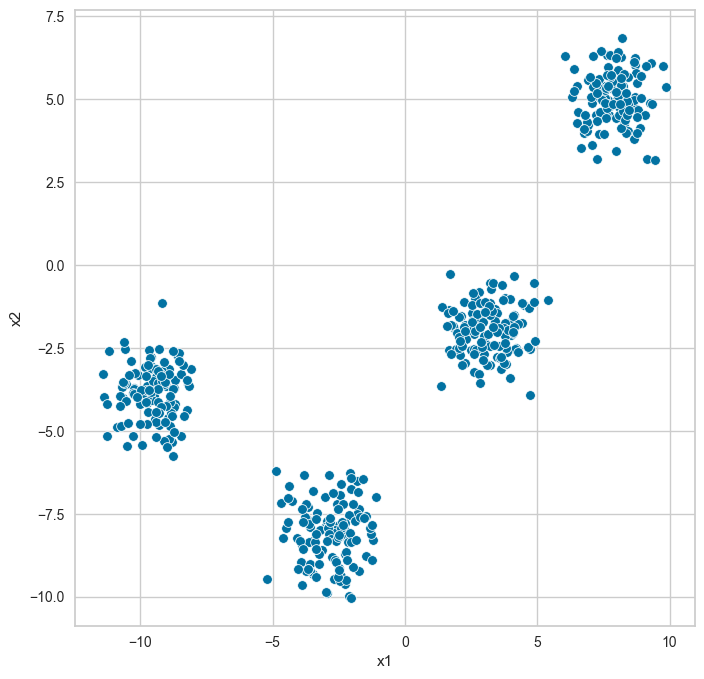

In [189]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

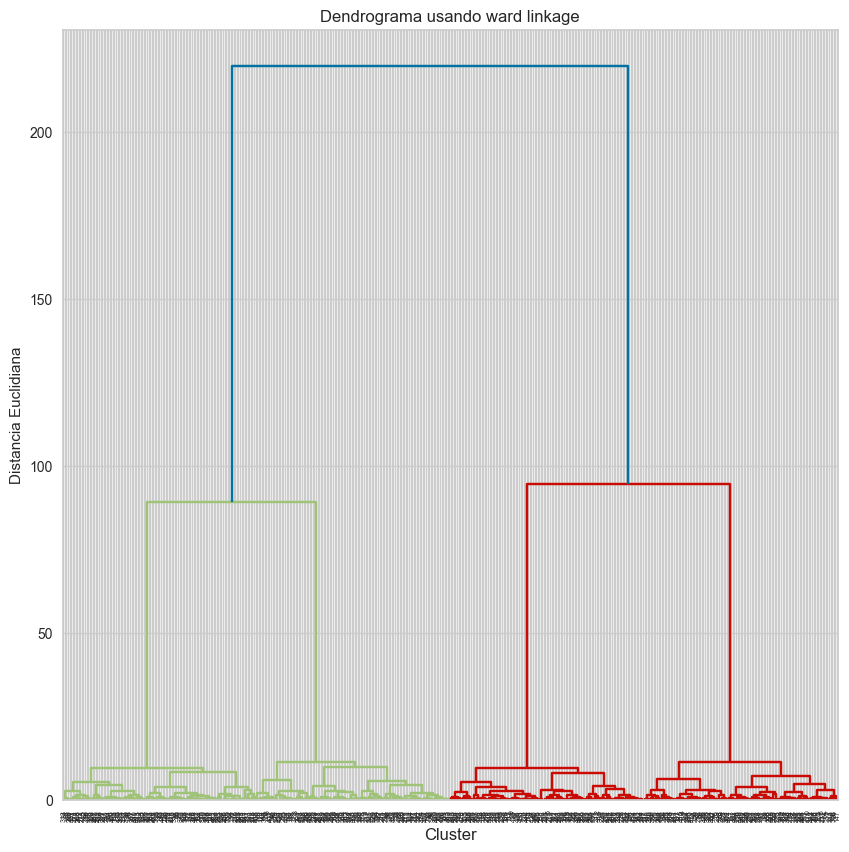

In [190]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclidiana')
plt.show()

In [191]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X)

In [192]:
df_blobs['cluster'] = y_hc

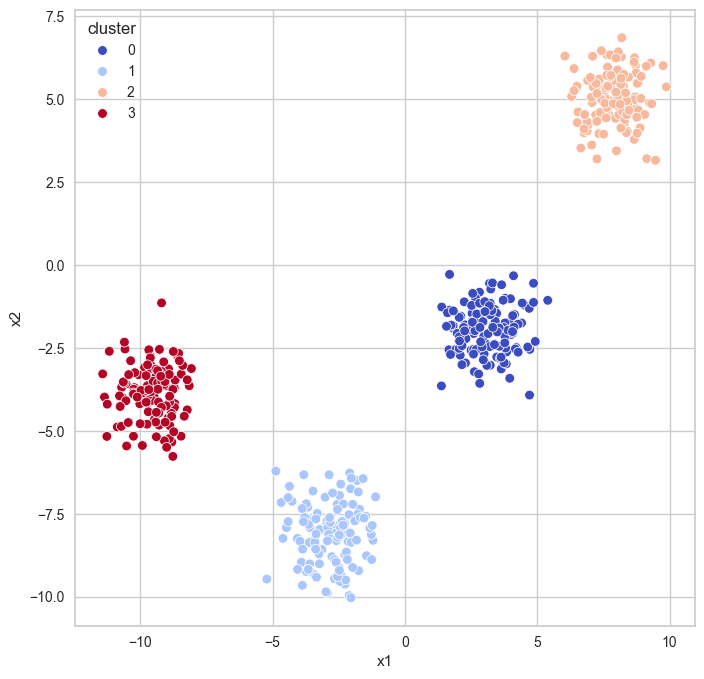

In [193]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()

In [194]:
silhouette_score(X,y_hc)

0.81792516170257

For n_clusters = 3 The average silhouette_score is : 0.683076637174773
For n_clusters = 4 The average silhouette_score is : 0.81792516170257
For n_clusters = 5 The average silhouette_score is : 0.6942566262233756


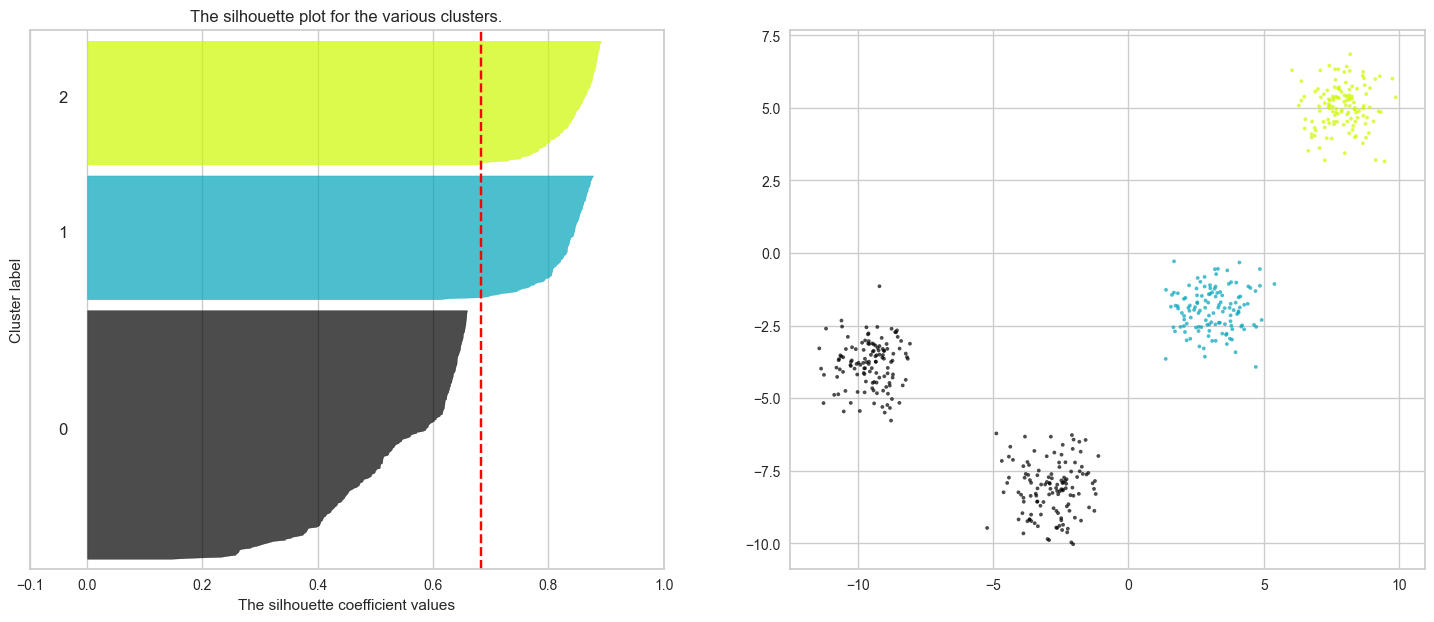

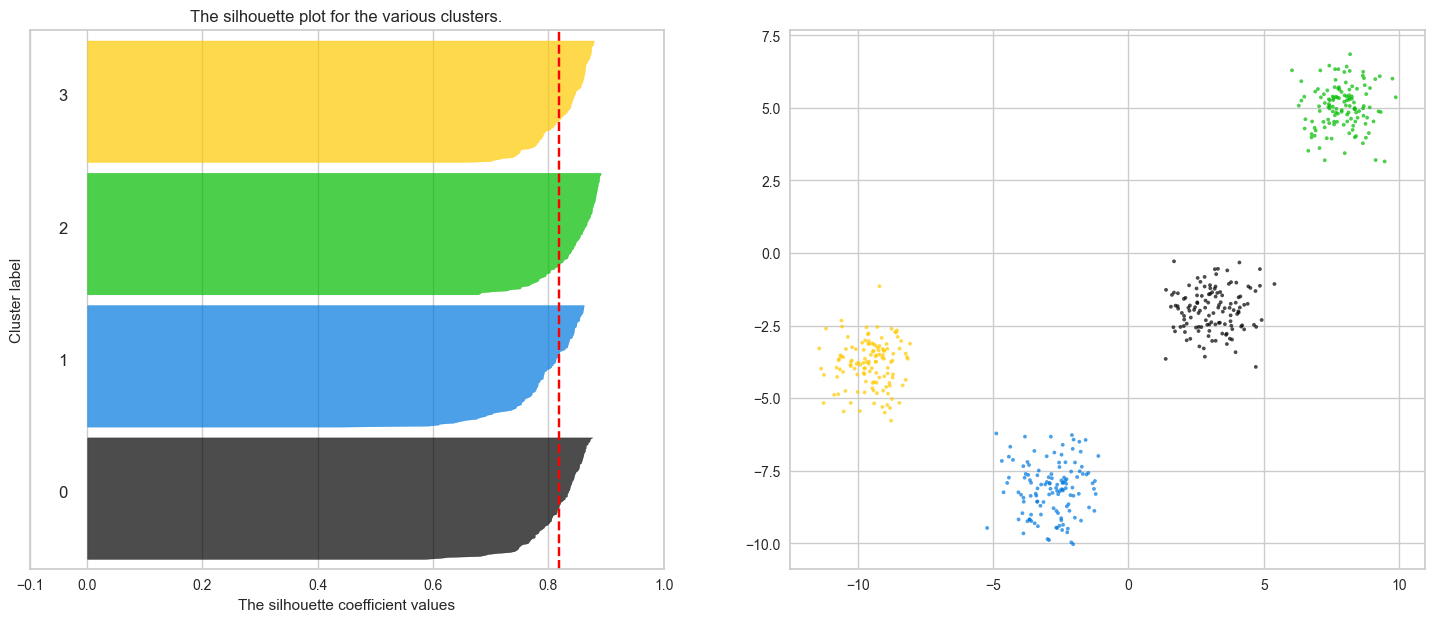

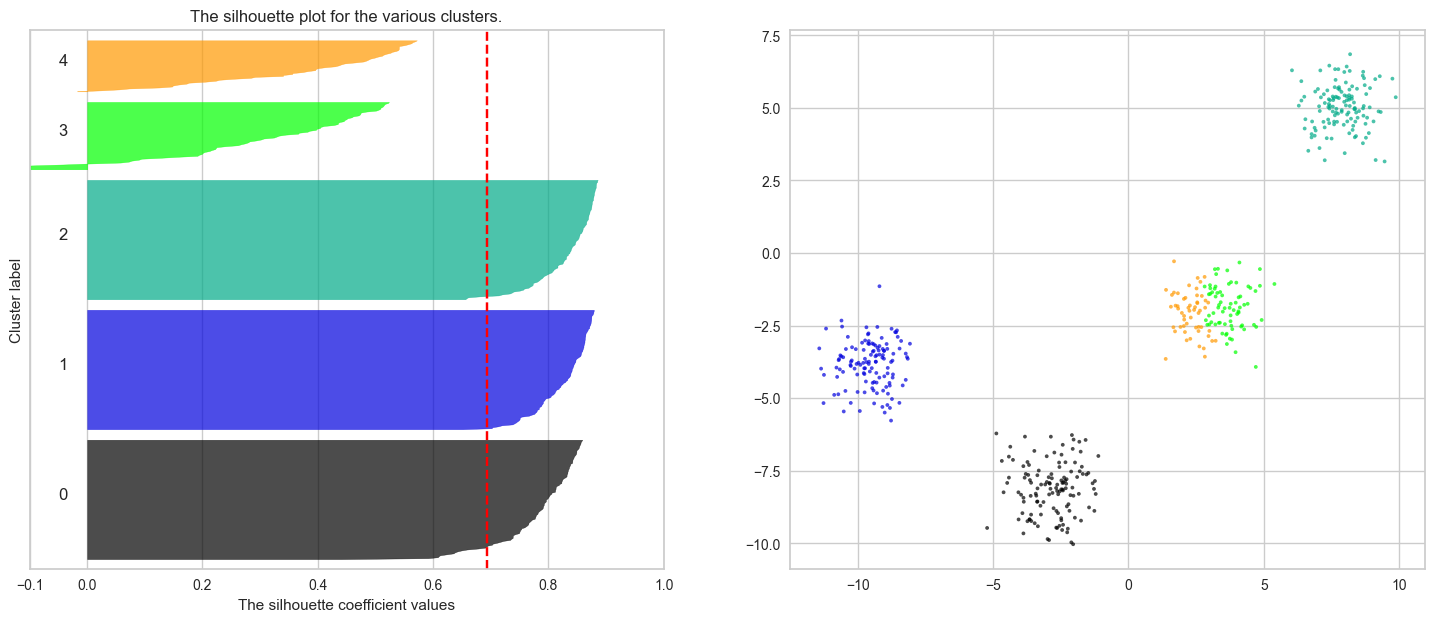

In [195]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


plt.show()

In [196]:
#DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [197]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

In [198]:
X_m ,y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
    )

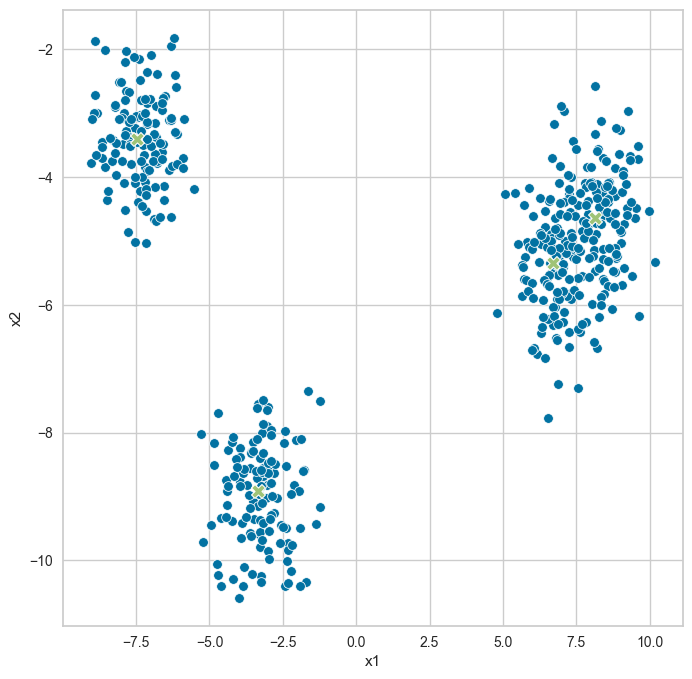

In [199]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

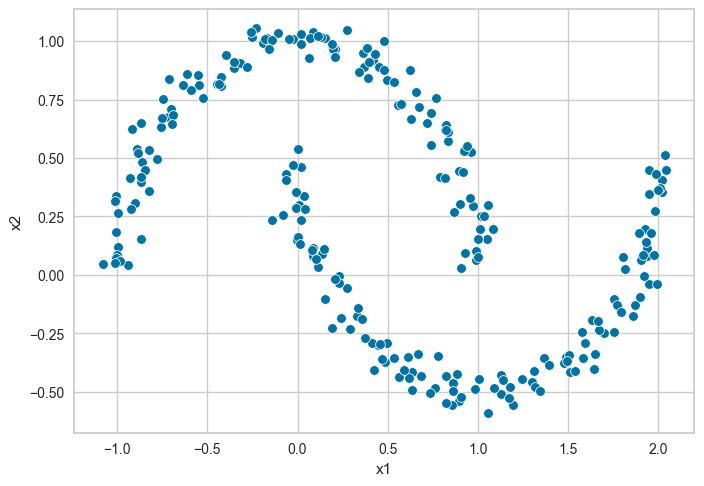

In [200]:
sns.scatterplot(data=df_moons, x='x1',y='x2')
plt.show()

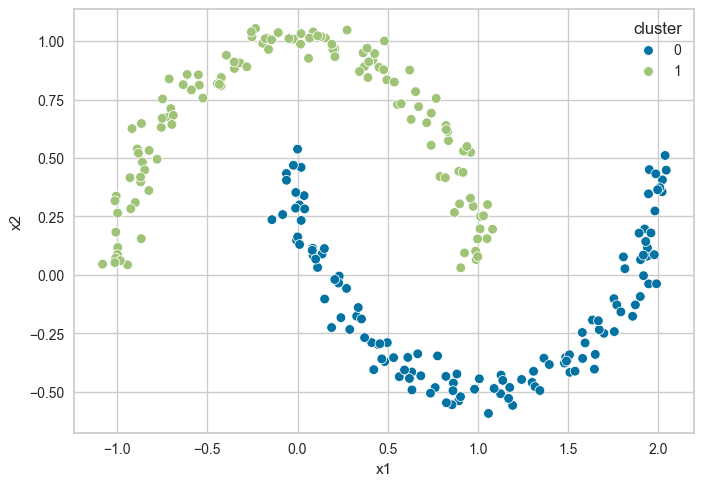

In [201]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1',y='x2', hue='cluster')
plt.show()

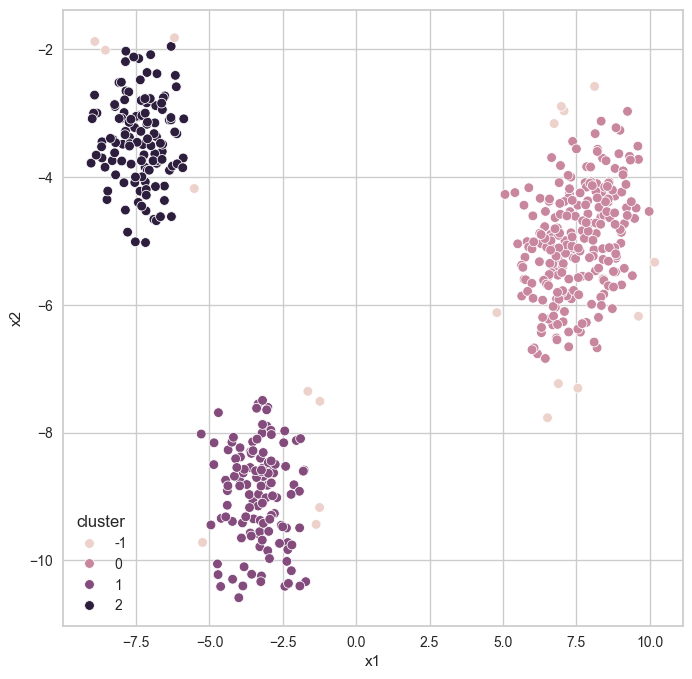

In [202]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

In [203]:
#Hiperparametros
from sklearn.neighbors import NearestNeighbors

In [204]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

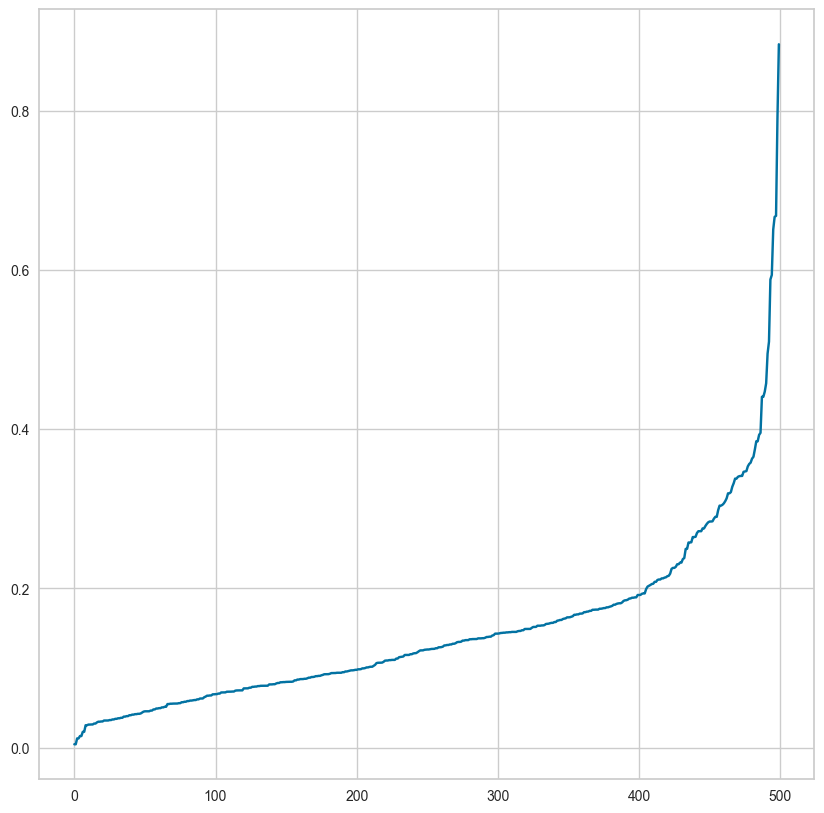

In [205]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [206]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2,10)

In [207]:
from itertools import product

In [208]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []

for p in dbscan_paramns:
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X,y_pred))

In [209]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [210]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')

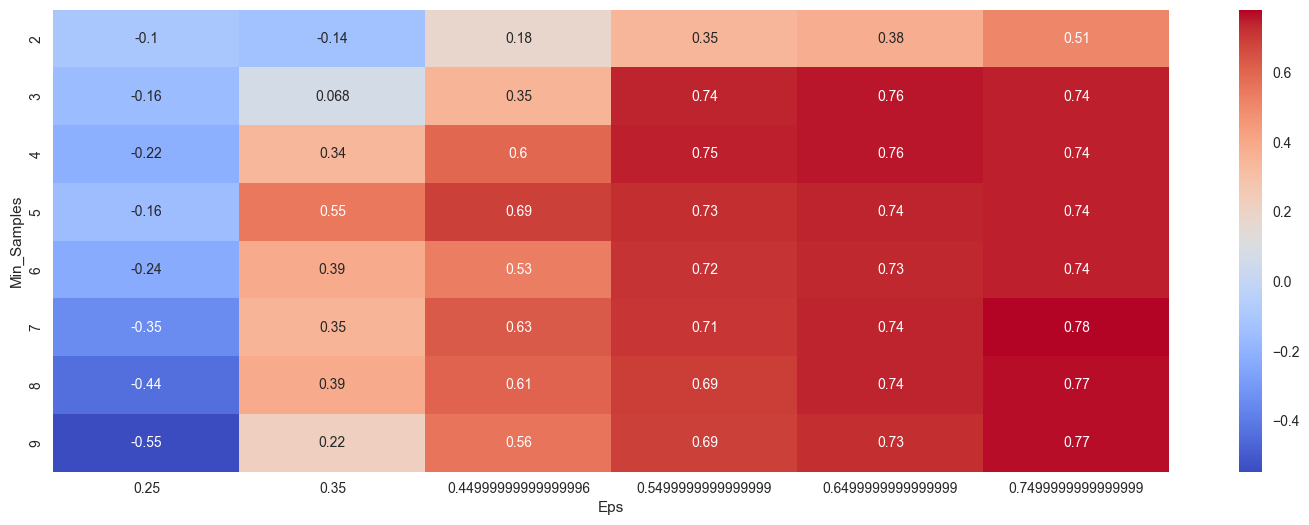

In [211]:
fig, ax  = plt.subplots(figsize =(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

In [212]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

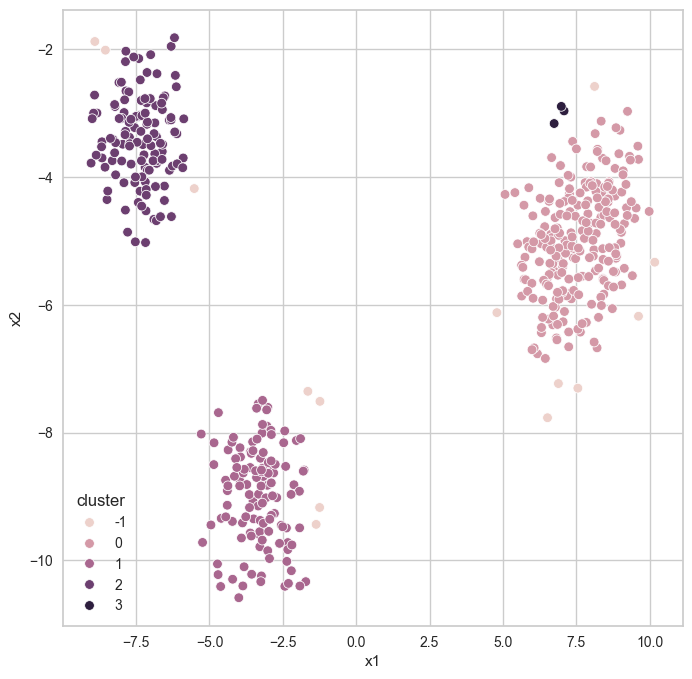

In [213]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2',hue='cluster')
plt.plot()
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.5014902646783697


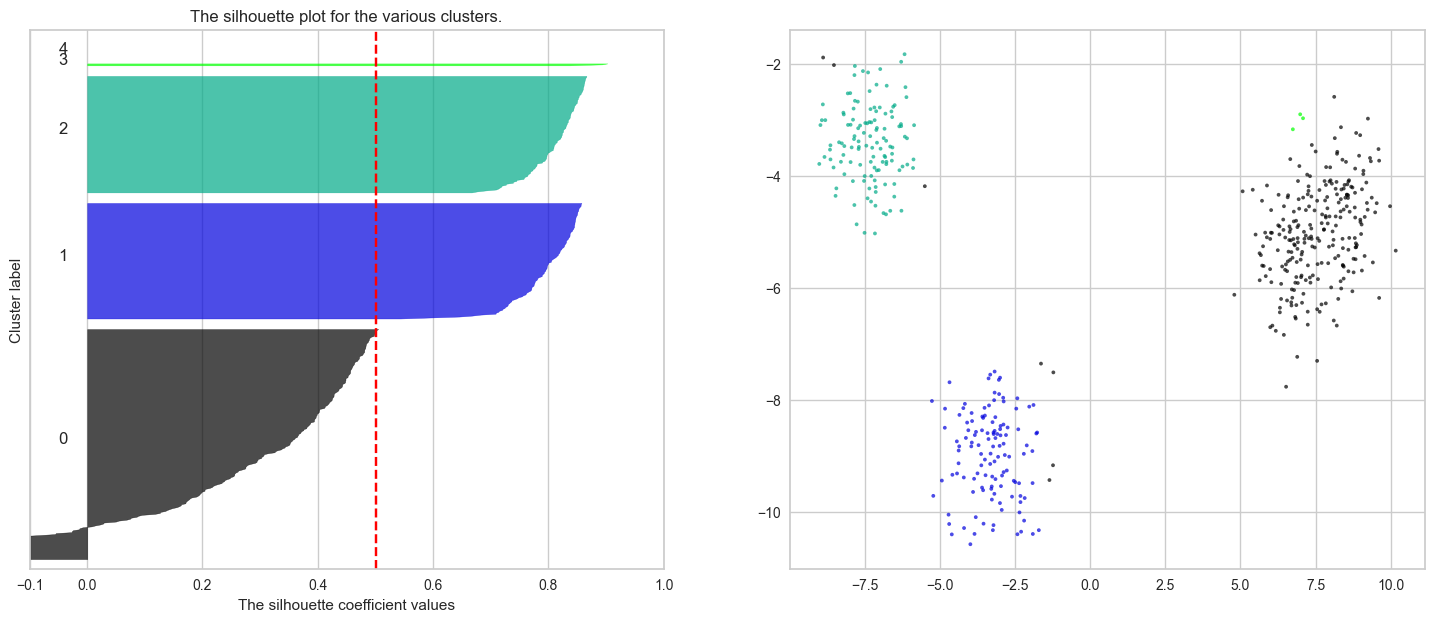

In [214]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()

In [7]:
#PRUEBA CON DATA DE VERDAD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import normalize

In [10]:
df_country = pd.read_csv('population_by_country_2020.csv')
columnas_a_eliminar = ['Country (or dependency)','Yearly Change', 'Urban Pop %', 'World Share']
df_country = df_country.drop(columns=columnas_a_eliminar)
df_country

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,1440297825,5540090,153,9388211,-348399.0,1.7,38
1,1382345085,13586631,464,2973190,-532687.0,2.2,28
2,331341050,1937734,36,9147420,954806.0,1.8,38
3,274021604,2898047,151,1811570,-98955.0,2.3,30
4,221612785,4327022,287,770880,-233379.0,3.6,23
...,...,...,...,...,...,...,...
230,4993,3,50,100,NaN,N.A.,N.A.
231,3497,103,0,12170,NaN,N.A.,N.A.
232,1628,11,6,260,NaN,N.A.,N.A.
233,1360,17,136,10,NaN,N.A.,N.A.


In [11]:
df_country.head()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,1440297825,5540090,153,9388211,-348399.0,1.7,38
1,1382345085,13586631,464,2973190,-532687.0,2.2,28
2,331341050,1937734,36,9147420,954806.0,1.8,38
3,274021604,2898047,151,1811570,-98955.0,2.3,30
4,221612785,4327022,287,770880,-233379.0,3.6,23


In [12]:
df_country.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.322744e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.353034e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.994905e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.460109e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.067170e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


In [13]:
#Valores nulos
df_country = df_country.dropna()
df_country.isnull().sum()



Population (2020)    0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
dtype: int64

In [12]:
#Valores duplicados
df_country[df_country.duplicated()]

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age


In [14]:
df_country

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,1440297825,5540090,153,9388211,-348399.0,1.7,38
1,1382345085,13586631,464,2973190,-532687.0,2.2,28
2,331341050,1937734,36,9147420,954806.0,1.8,38
3,274021604,2898047,151,1811570,-98955.0,2.3,30
4,221612785,4327022,287,770880,-233379.0,3.6,23
...,...,...,...,...,...,...,...
196,106845,452,593,180,201.0,1.9,41
197,105901,1201,147,720,-800.0,3.6,22
198,104398,-153,298,350,-451.0,2.0,43
199,98453,608,214,460,-200.0,2.5,34


In [13]:
df_country_norm = normalize(df_country)
valor_norm = df_country_norm.max()
valor_norm

0.9999978099498046

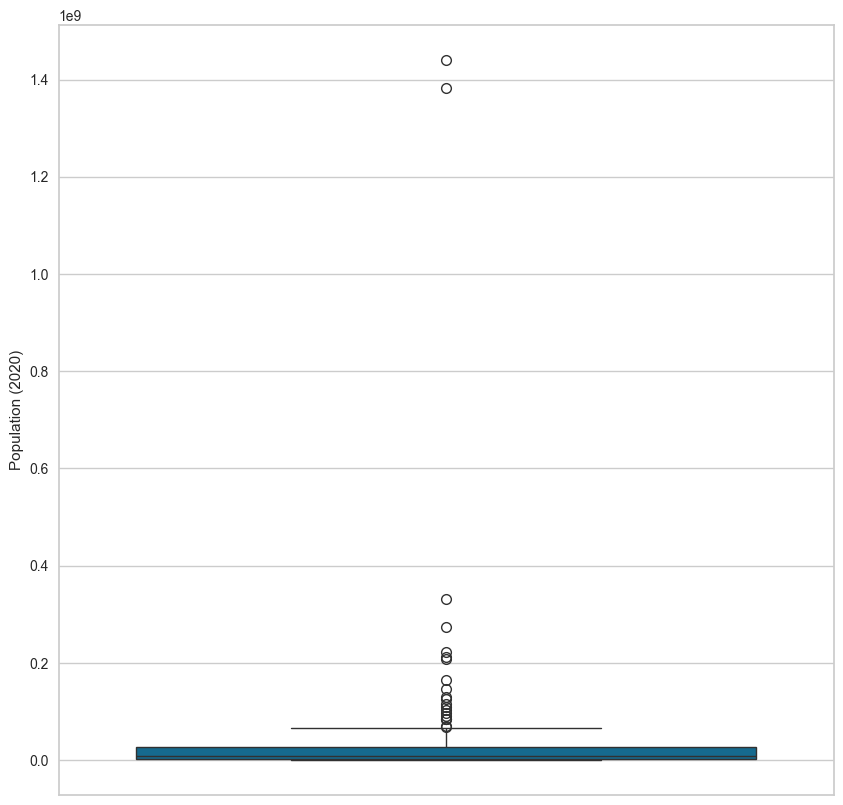

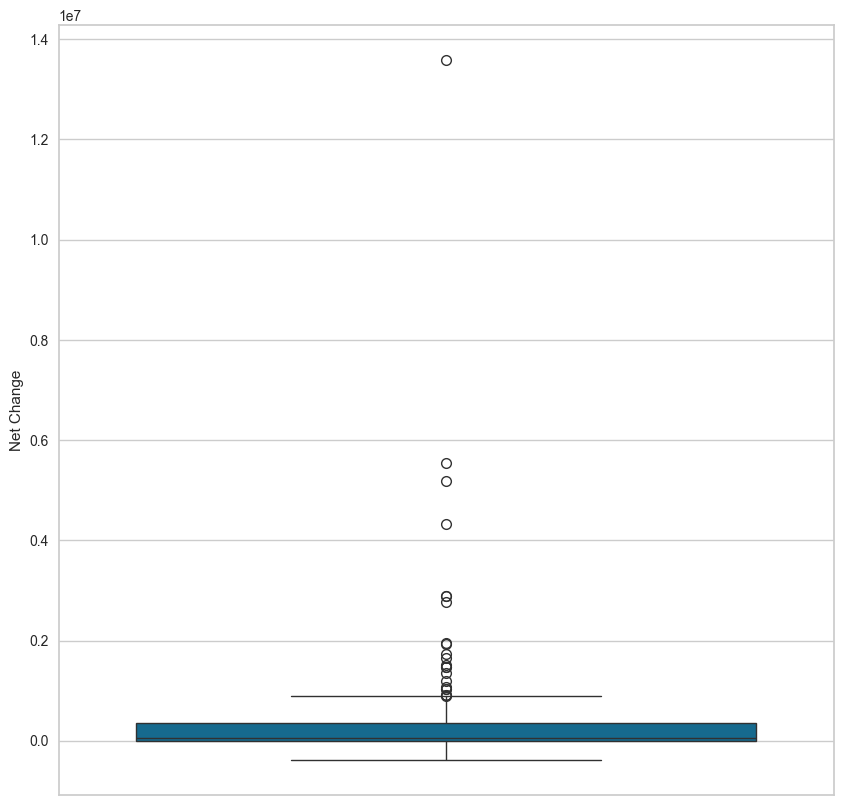

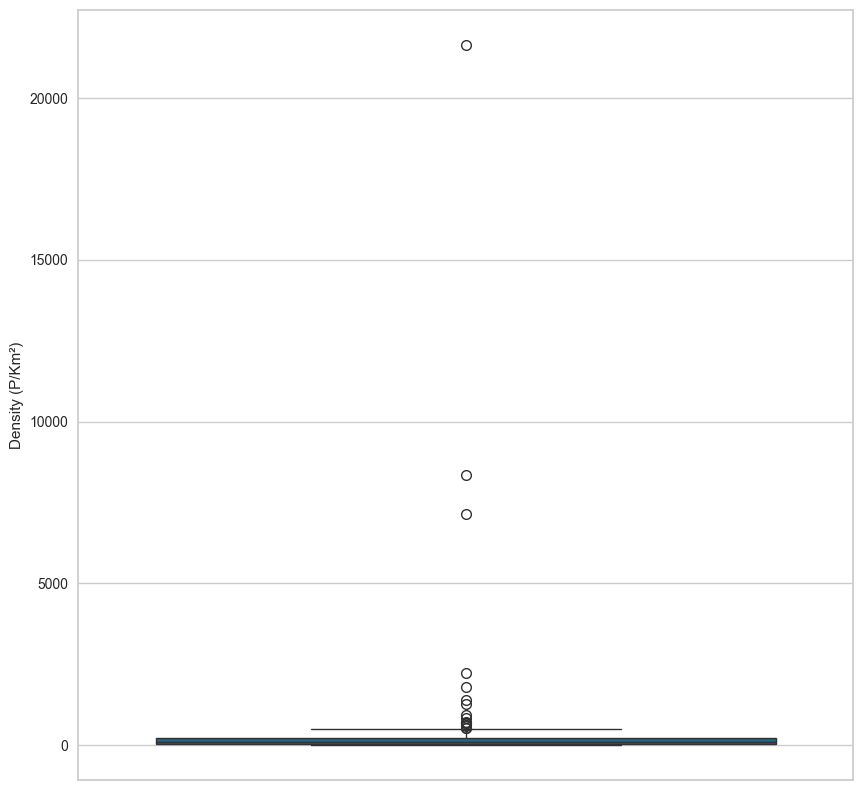

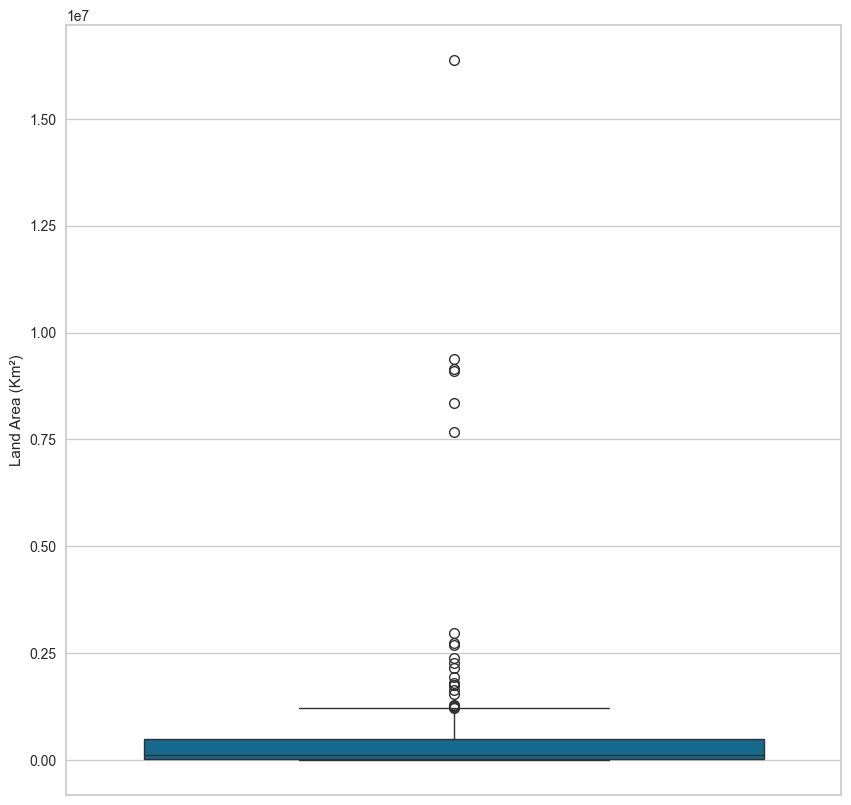

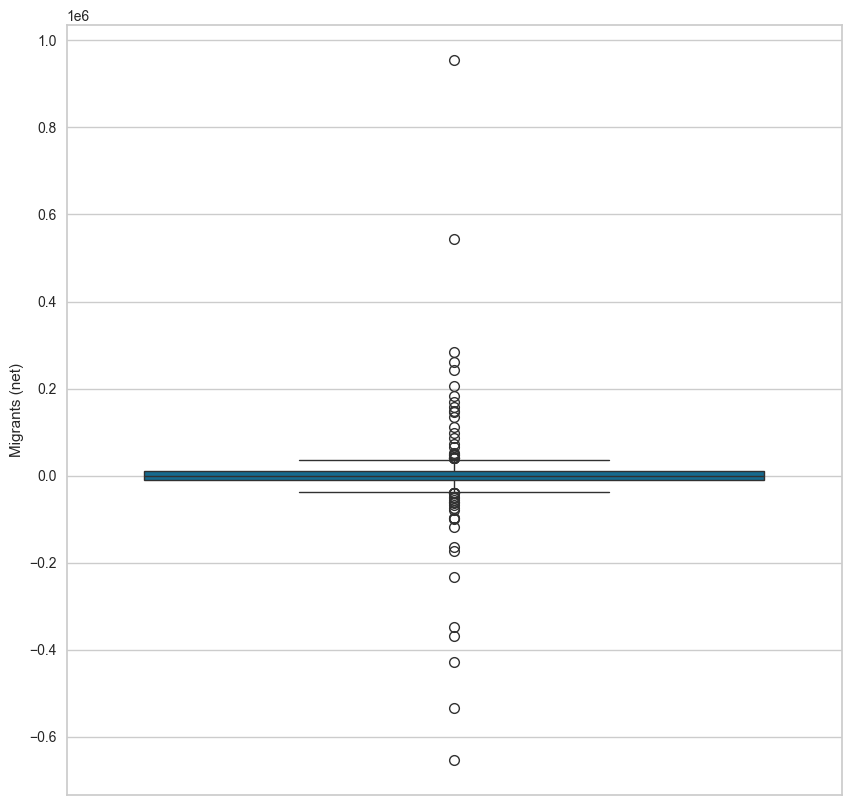

In [221]:
#Analisis de distribucion
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y= _)
    plt.show()

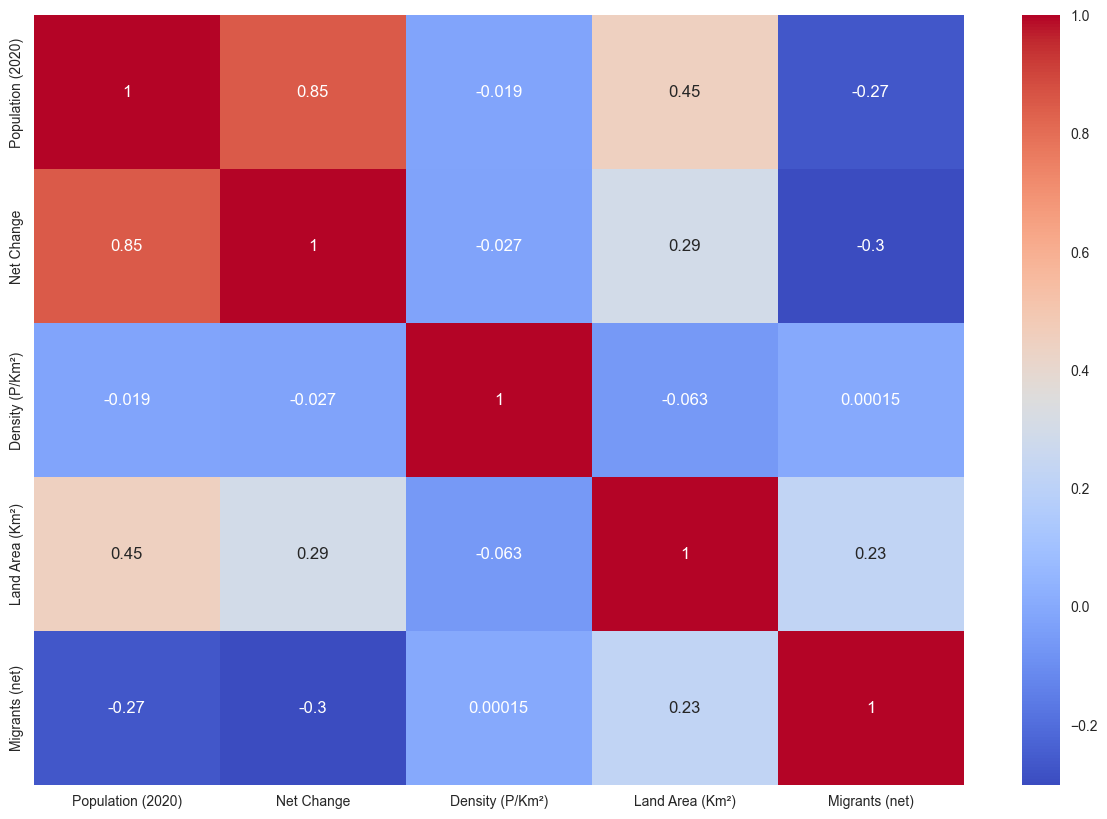

In [222]:
# Seleccionar solo las columnas numéricas
df_numeric = df_country.select_dtypes(include=[np.number])
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [223]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_country_scaled = scaaler.fit_transform(df_country.drop('Country (or dependency)',axis=1))

In [224]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns = df_country.drop('Country (or dependency)',axis=1).columns )

In [225]:
df_country_scaled

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age
0,9.649220,4.252635,-0.120542,4.844099,-2.832913,-0.787281,0.811955
1,9.250207,10.915877,0.061771,1.289877,-4.331375,-0.390880,-0.286315
2,2.013895,1.269568,-0.189129,4.710690,7.763558,-0.708001,0.811955
3,1.619242,2.064791,-0.121714,0.646285,-0.804663,-0.311599,-0.066661
4,1.258400,3.248108,-0.041989,0.069693,-1.897676,0.719045,-0.835450
...,...,...,...,...,...,...,...
196,-0.266700,-0.334672,0.137393,-0.357311,0.001583,-0.628721,1.141436
197,-0.266706,-0.334052,-0.124059,-0.357011,-0.006556,0.719045,-0.945277
198,-0.266716,-0.335173,-0.035540,-0.357216,-0.003718,-0.549440,1.361090
199,-0.266757,-0.334543,-0.084783,-0.357155,-0.001677,-0.153039,0.372647


In [226]:
#Analisis factorial exploratorio por componentes principales o PCA
from sklearn.decomposition import PCA

In [227]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[ 8.89777452, -7.27134771, -0.19786864, ...,  1.27502969,
        -0.71041194,  3.104993  ],
       [12.61274659, -6.52829876, -3.79777074, ..., -2.80380371,
         0.0887607 , -0.90483728],
       [ 0.16126275, -4.16616068,  7.68429639, ..., -2.50005811,
        -0.45889096,  0.14150622],
       ...,
       [-1.08906188, -0.75636594, -0.3891348 , ..., -0.09569772,
         0.5770397 ,  0.09968662],
       [-0.59341065,  0.02828278, -0.19602395, ..., -0.06290583,
         0.13828295,  0.08090927],
       [-0.72848064, -0.19657149, -0.26502574, ..., -0.058934  ,
        -0.11762434, -0.03235763]])

In [228]:
var = pca.explained_variance_ratio_
print(var)

[0.32331295 0.27451906 0.17069095 0.13232654 0.06734548 0.01640589
 0.01539913]


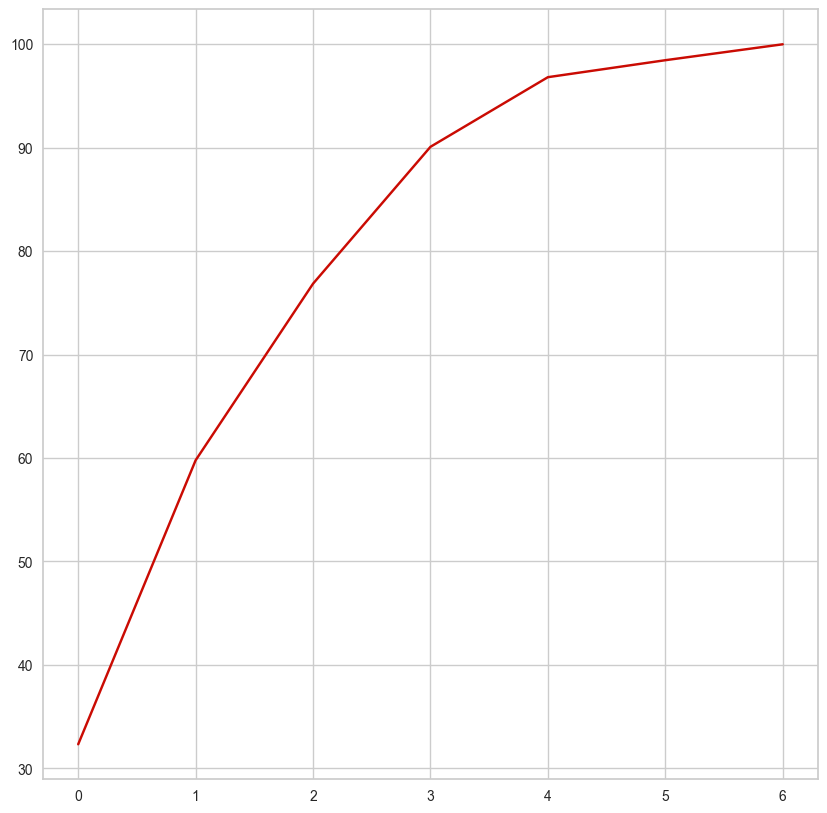

In [229]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

In [230]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6],axis=1, inplace=True)

In [231]:
pca_data_standard

,0,1,2,3
0,8.897775,-7.271348,-0.197869,-0.351065
1,12.612747,-6.528299,-3.797771,-0.758174
2,0.161263,-4.166161,7.684296,2.532806
3,2.350509,-1.431544,-0.458026,-0.230605
4,3.638303,-0.281602,-1.409681,-0.182891
...,...,...,...,...
196,-1.057633,-0.702814,-0.441333,-0.271279
197,0.182739,1.265459,0.105354,0.125787
198,-1.089062,-0.756366,-0.389135,-0.452954
199,-0.593411,0.028283,-0.196024,-0.243164


In [232]:
#Importar librerias para clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [233]:
#KMEANS
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

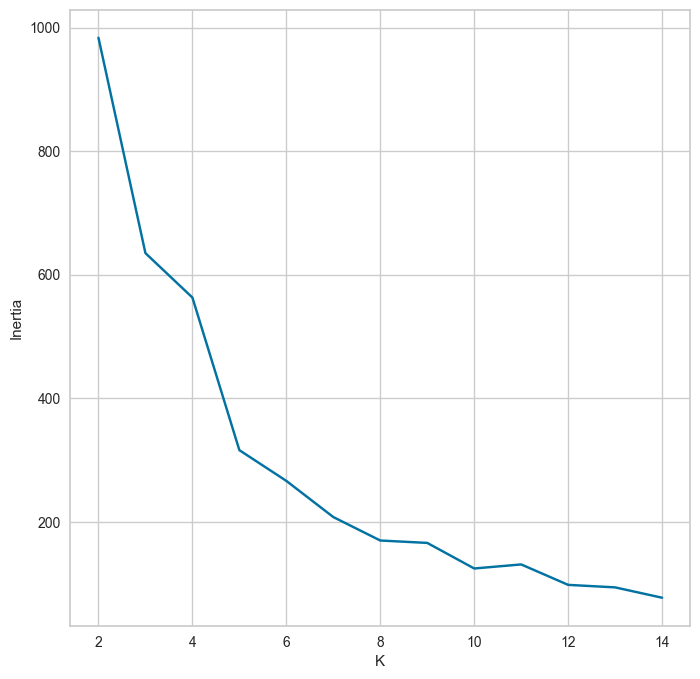

In [234]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

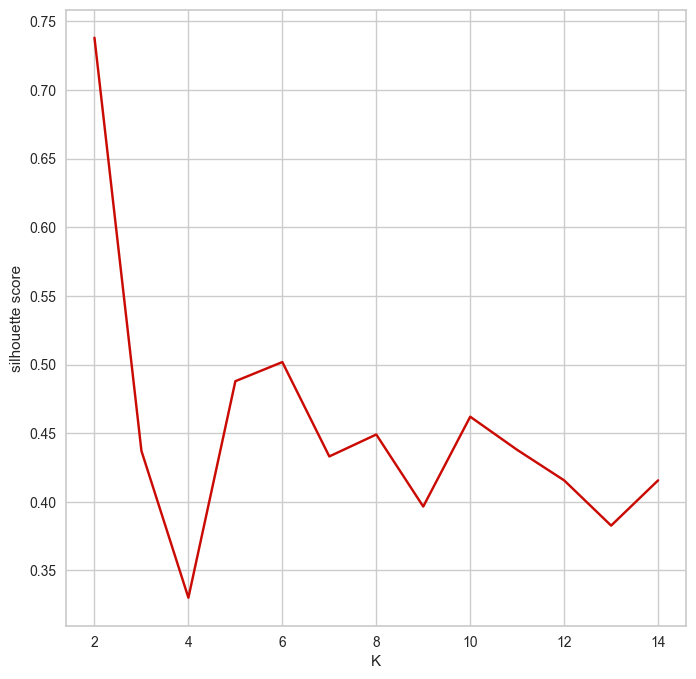

In [235]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [236]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca'] = y

0.47046153628713494


In [237]:
#KMEANS SIN PCA
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,y))

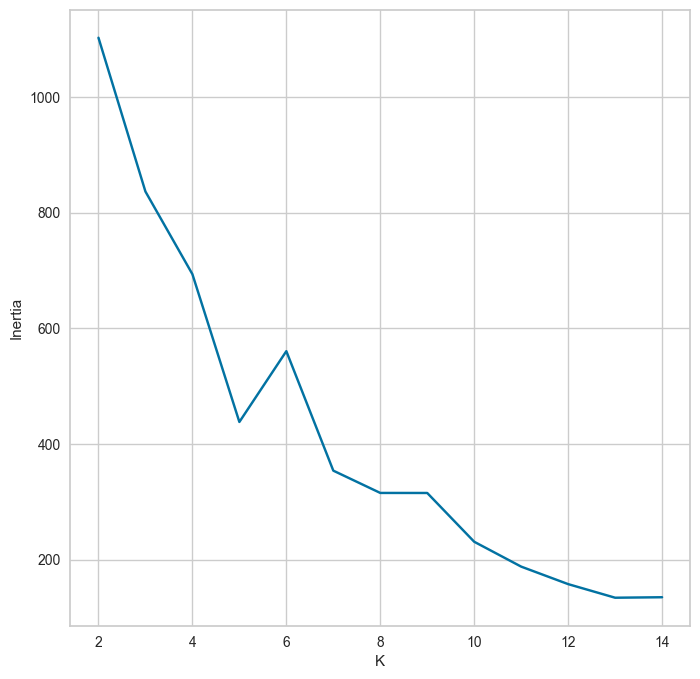

In [238]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

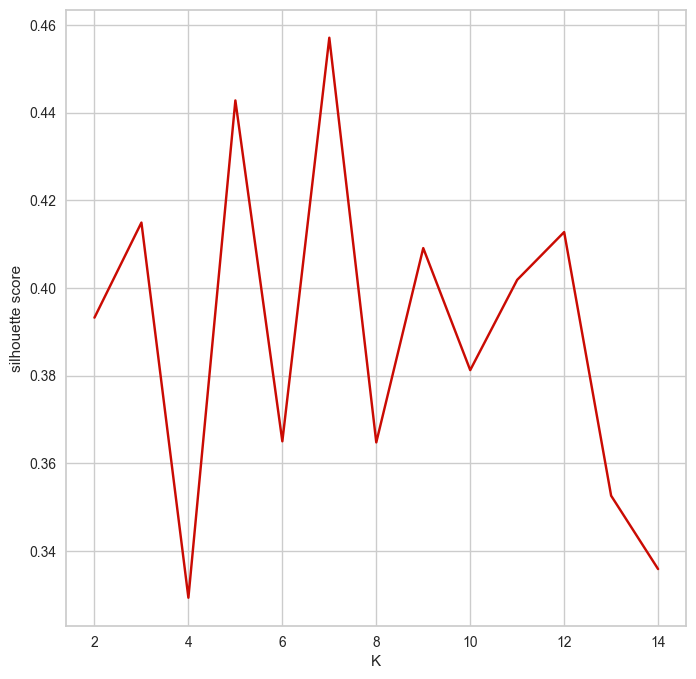

In [239]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [240]:
km = KMeans(n_clusters = 5)
y = km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means'] = y

0.39316700727275006


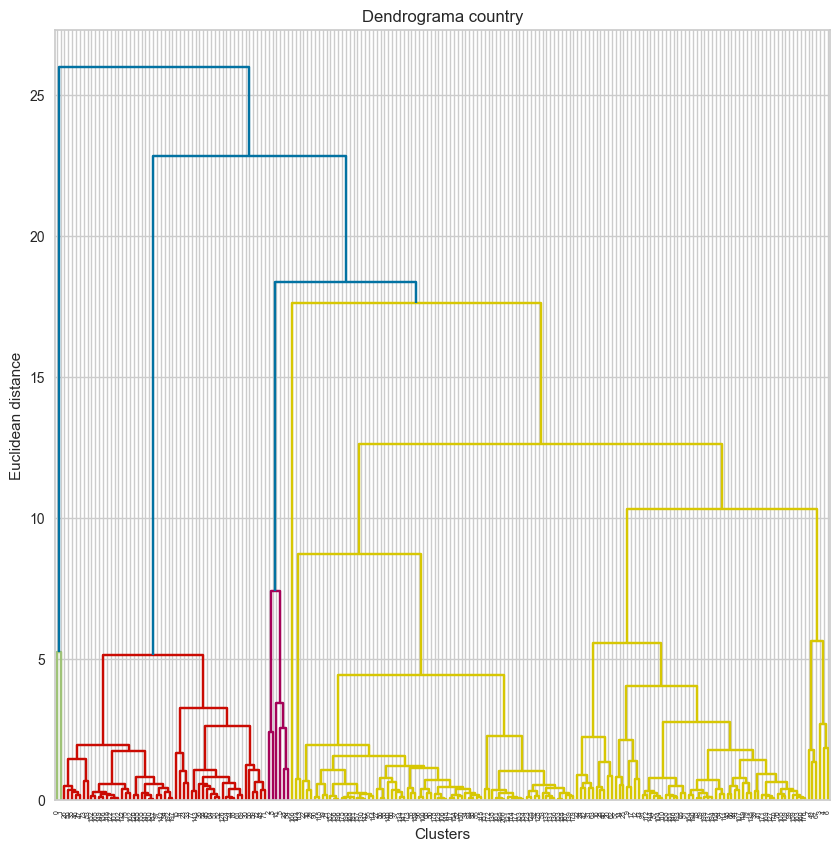

In [241]:
#CLUSTER JERARQUICO con PCA
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [242]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc ))
df_country['hc_pca'] = y_hc

0.8219026857704487


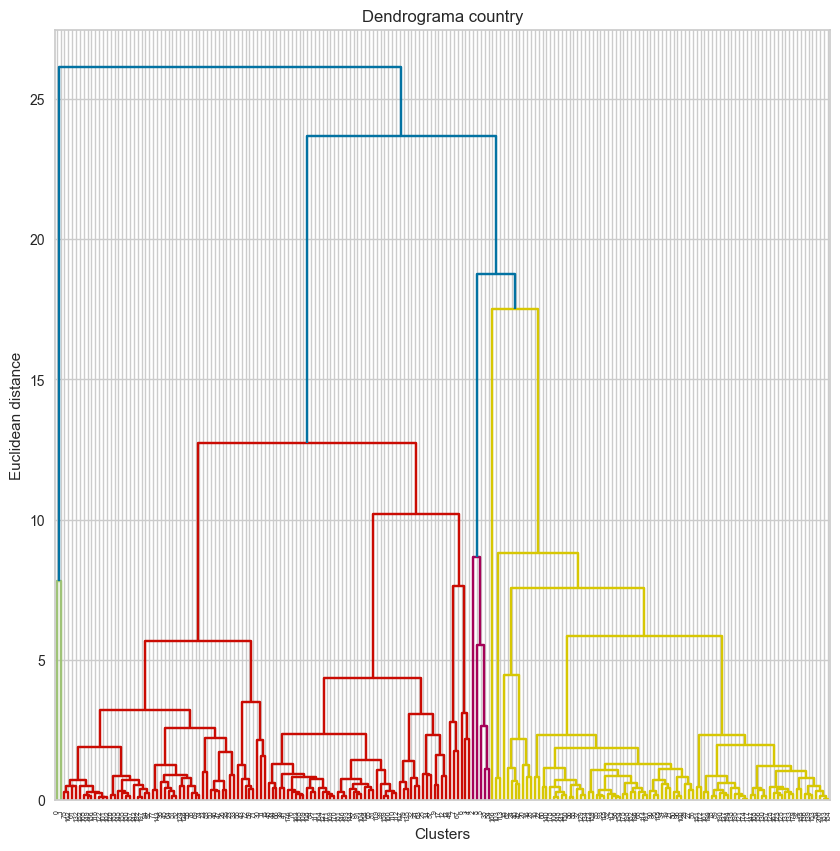

In [243]:
#CLUSTER JERARQUICO sin PCA
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [244]:
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_hc = hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc ))
df_country['hc'] = y_hc

0.8126436972943156


In [245]:
#DBSCAN con PCA
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

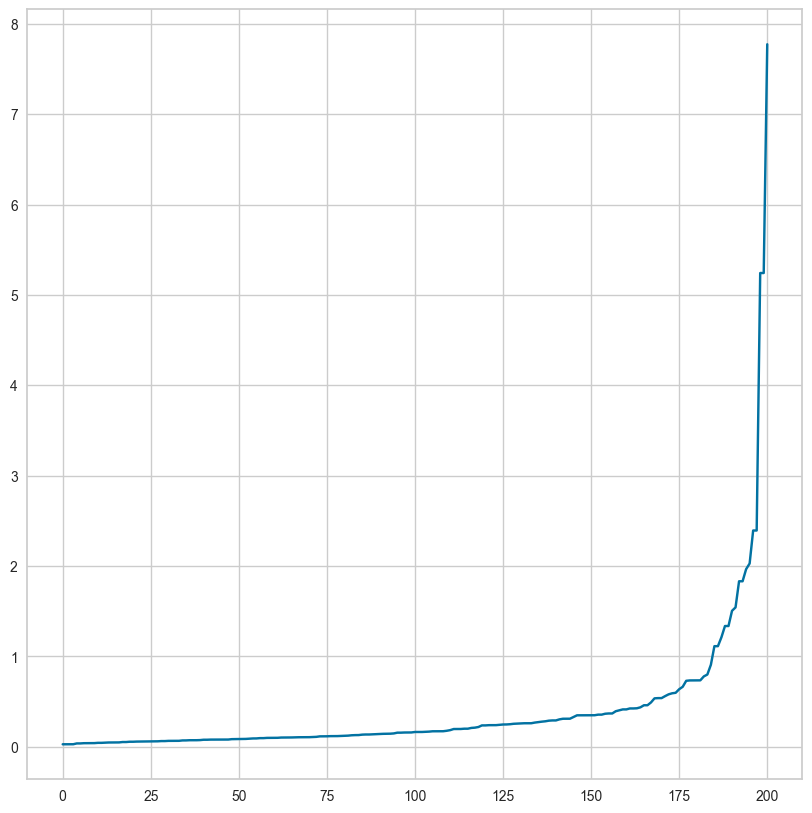

In [246]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [247]:
eps_values = np.arange(0.5, 2.0, 0.10)
min_samples = np.arange(3,12)

In [248]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [249]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [250]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

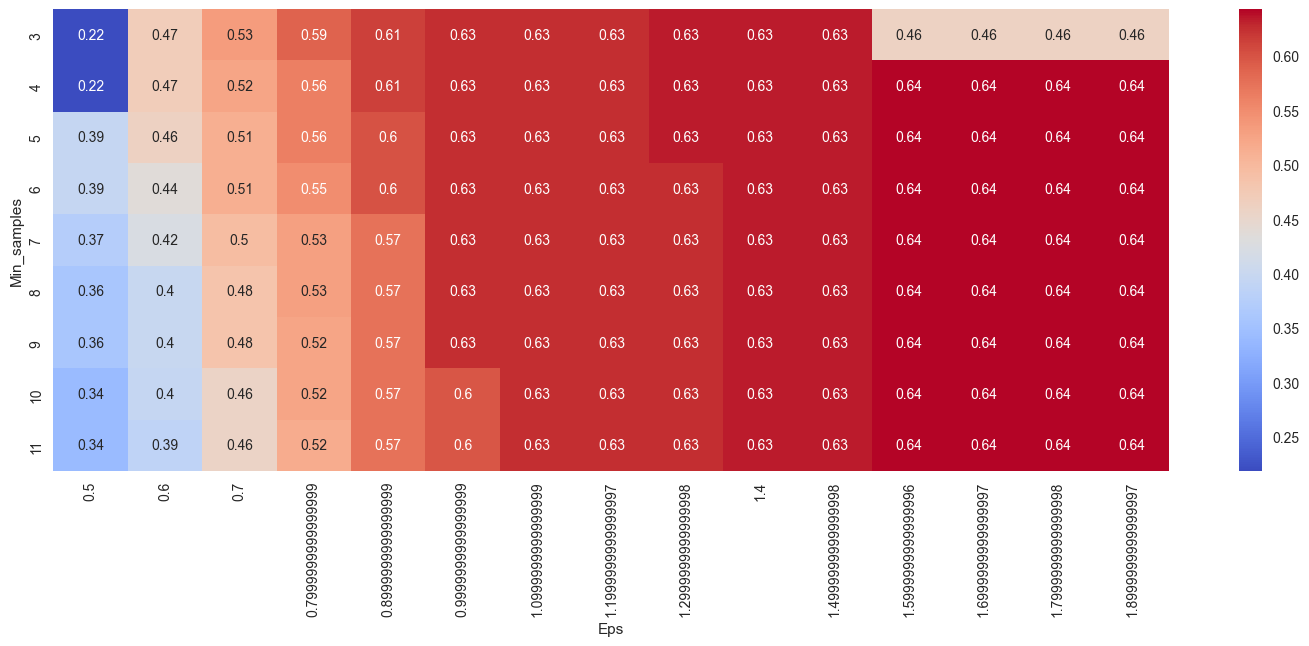

In [251]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

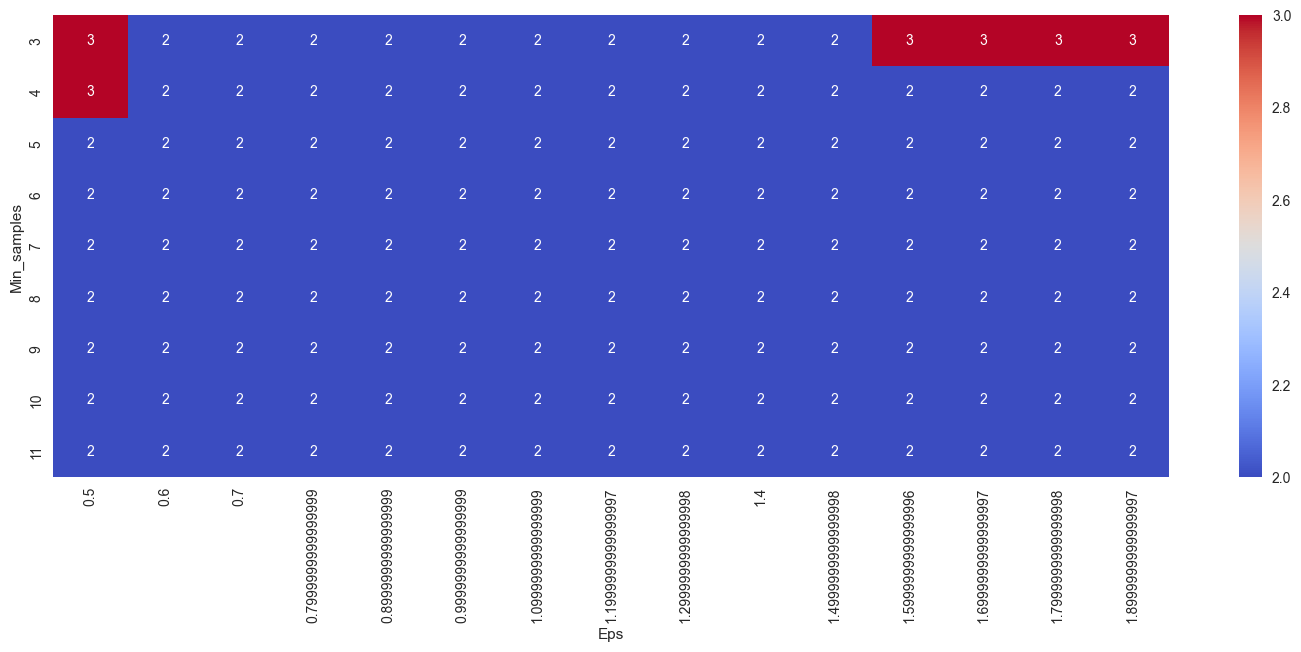

In [252]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [253]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan ))
df_country['dbscan_pca'] = y_dbscan

0.6252834810097215


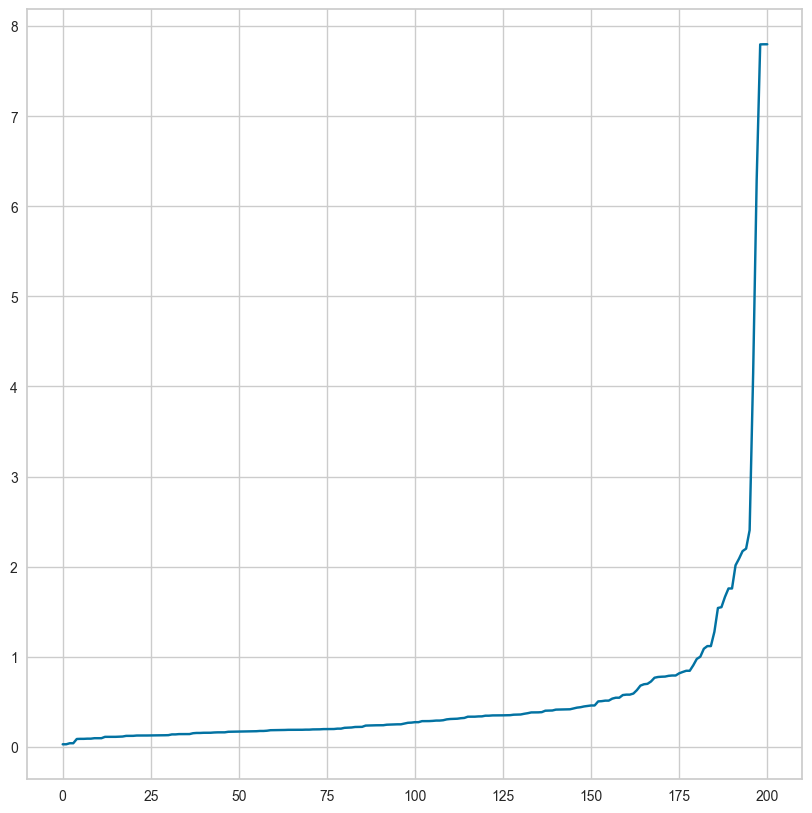

In [254]:
#DBSCAN sin PCA
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [255]:
eps_values = np.arange(1, 3.0, 0.10)
min_samples = np.arange(3,12)

In [256]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
    try:
        sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [257]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [258]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

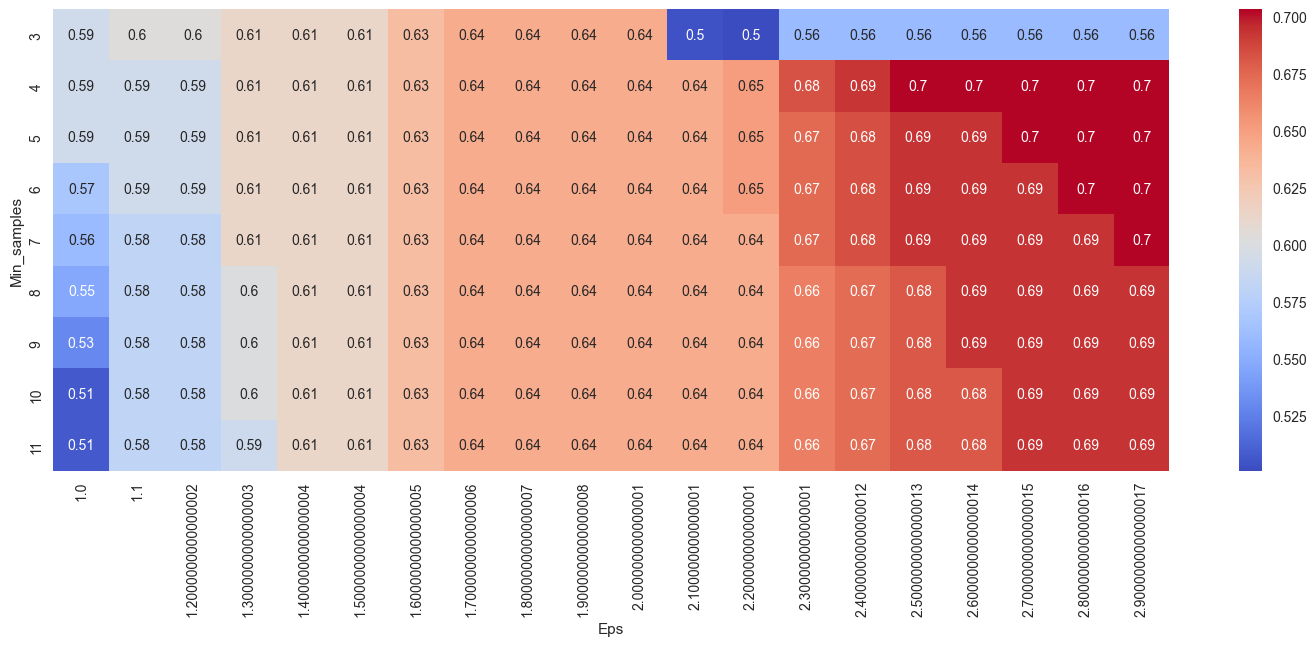

In [259]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

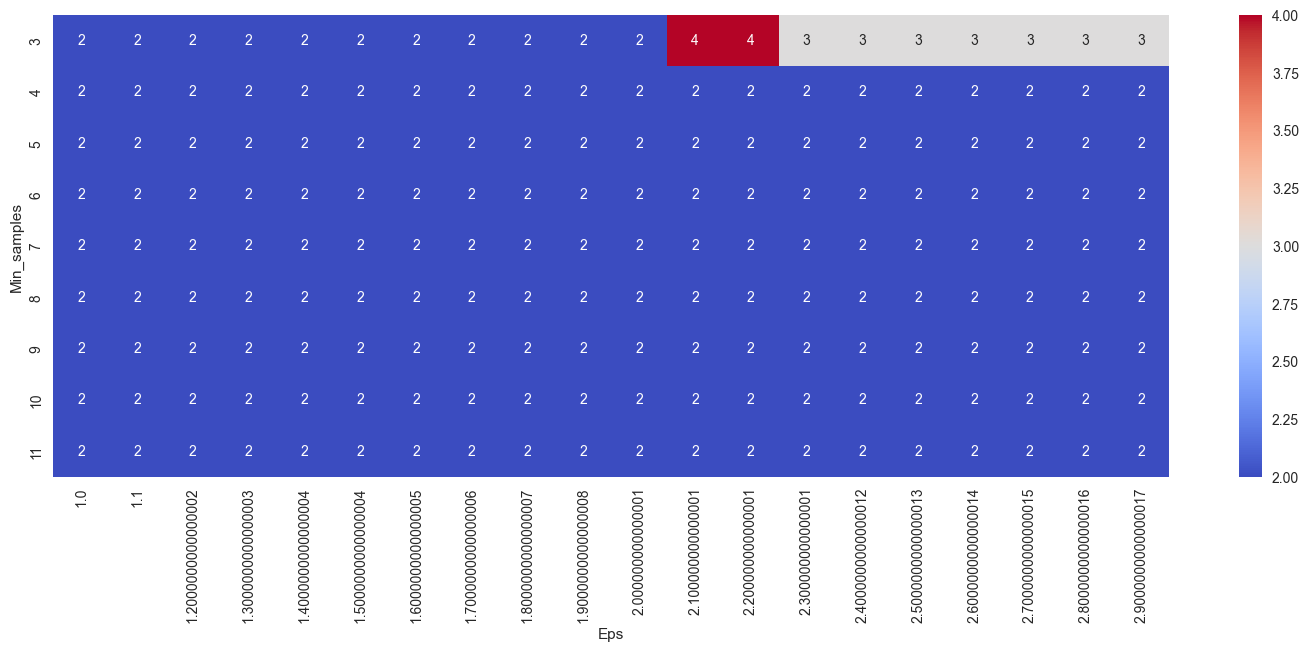

In [260]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [261]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan ))
df_country['dbscan_cluster'] = y_dbscan

0.6429120367960935


In [262]:
df_country

,Country (or dependency),Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,China,1440297825,5540090,153,9388211,-348399.0,1.7,38,1,4,1,1,-1,-1
1,India,1382345085,13586631,464,2973190,-532687.0,2.2,28,1,4,1,1,-1,-1
2,United States,331341050,1937734,36,9147420,954806.0,1.8,38,3,2,0,0,-1,-1
3,Indonesia,274021604,2898047,151,1811570,-98955.0,2.3,30,0,0,0,0,-1,0
4,Pakistan,221612785,4327022,287,770880,-233379.0,3.6,23,2,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Aruba,106845,452,593,180,201.0,1.9,41,0,2,0,0,0,0
197,Tonga,105901,1201,147,720,-800.0,3.6,22,2,1,0,0,0,0
198,U.S. Virgin Islands,104398,-153,298,350,-451.0,2.0,43,0,2,0,0,0,0
199,Seychelles,98453,608,214,460,-200.0,2.5,34,0,2,0,0,0,0


In [263]:
#Evaluacion de resultados
df_country.columns

Index(['Country (or dependency)', 'Population (2020)', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'k_means_pca', 'k_means', 'hc_pca', 'hc', 'dbscan_pca',
       'dbscan_cluster'],
      dtype='object')

In [264]:
df_country[['Country (or dependency)', 'k_means_pca', 'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster']]

,Country (or dependency),k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,China,1,4,1,1,-1,-1
1,India,1,4,1,1,-1,-1
2,United States,3,2,0,0,-1,-1
3,Indonesia,0,0,0,0,-1,0
4,Pakistan,2,0,0,0,-1,-1
...,...,...,...,...,...,...,...
196,Aruba,0,2,0,0,0,0
197,Tonga,2,1,0,0,0,0
198,U.S. Virgin Islands,0,2,0,0,0,0
199,Seychelles,0,2,0,0,0,0


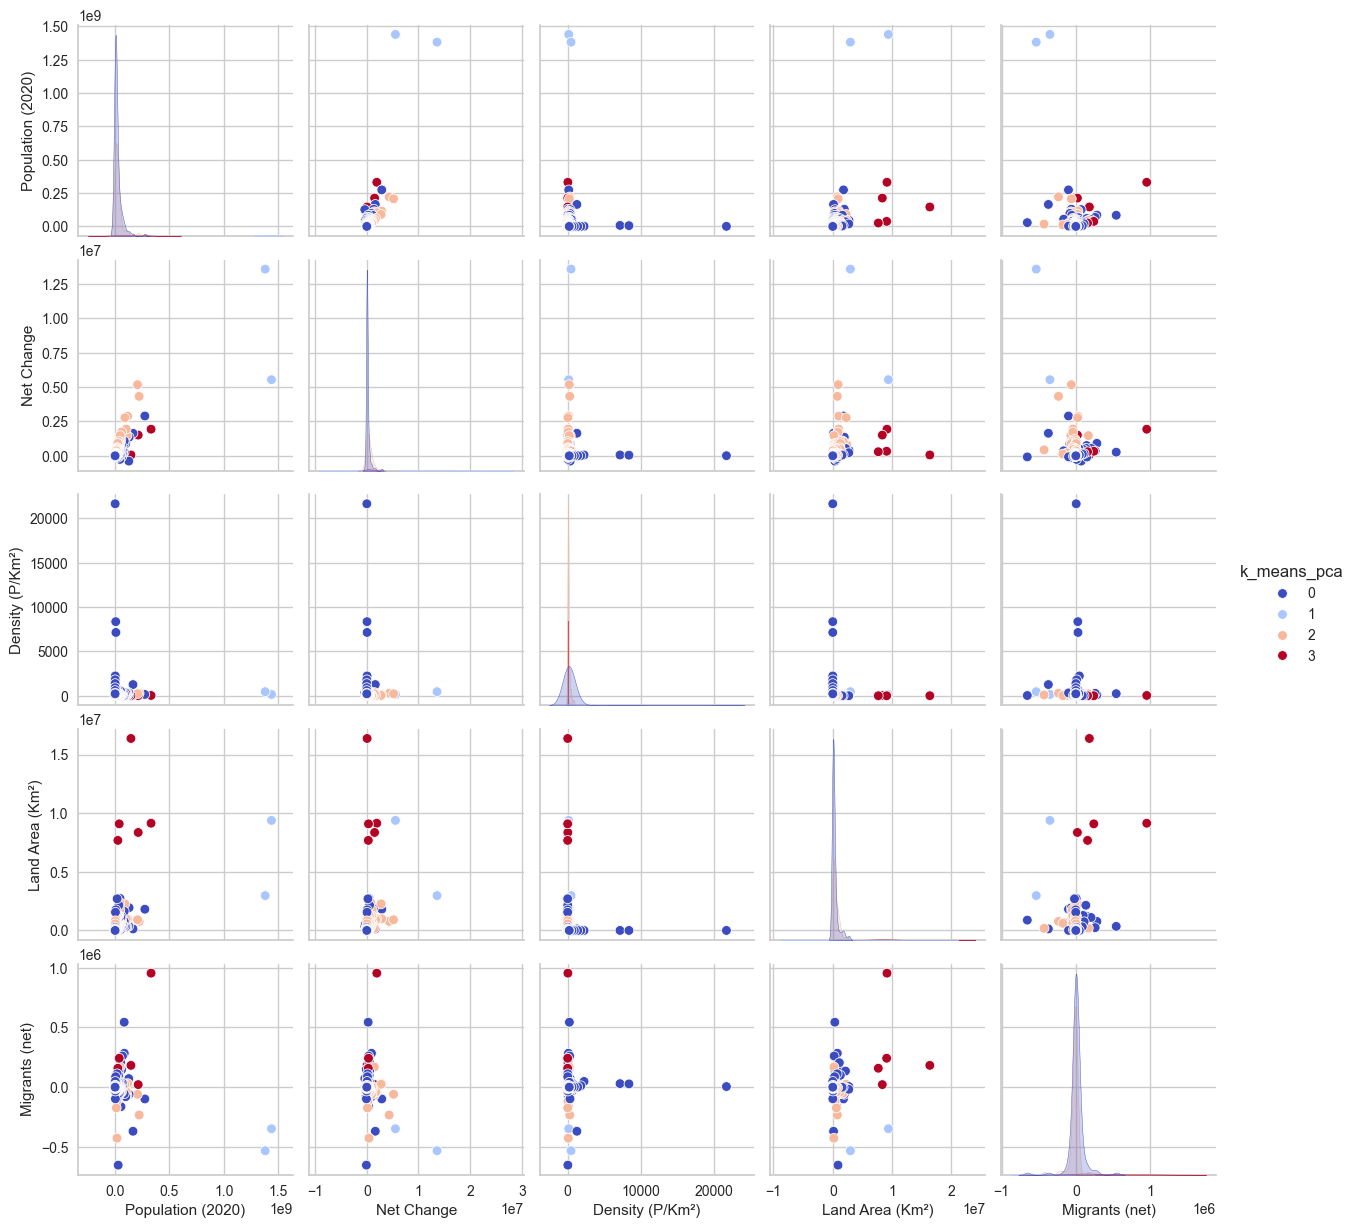

In [265]:
sns.pairplot(data = df_country[['Country (or dependency)', 'Population (2020)', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

In [266]:
df_country

,Country (or dependency),Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,China,1440297825,5540090,153,9388211,-348399.0,1.7,38,1,4,1,1,-1,-1
1,India,1382345085,13586631,464,2973190,-532687.0,2.2,28,1,4,1,1,-1,-1
2,United States,331341050,1937734,36,9147420,954806.0,1.8,38,3,2,0,0,-1,-1
3,Indonesia,274021604,2898047,151,1811570,-98955.0,2.3,30,0,0,0,0,-1,0
4,Pakistan,221612785,4327022,287,770880,-233379.0,3.6,23,2,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Aruba,106845,452,593,180,201.0,1.9,41,0,2,0,0,0,0
197,Tonga,105901,1201,147,720,-800.0,3.6,22,2,1,0,0,0,0
198,U.S. Virgin Islands,104398,-153,298,350,-451.0,2.0,43,0,2,0,0,0,0
199,Seychelles,98453,608,214,460,-200.0,2.5,34,0,2,0,0,0,0


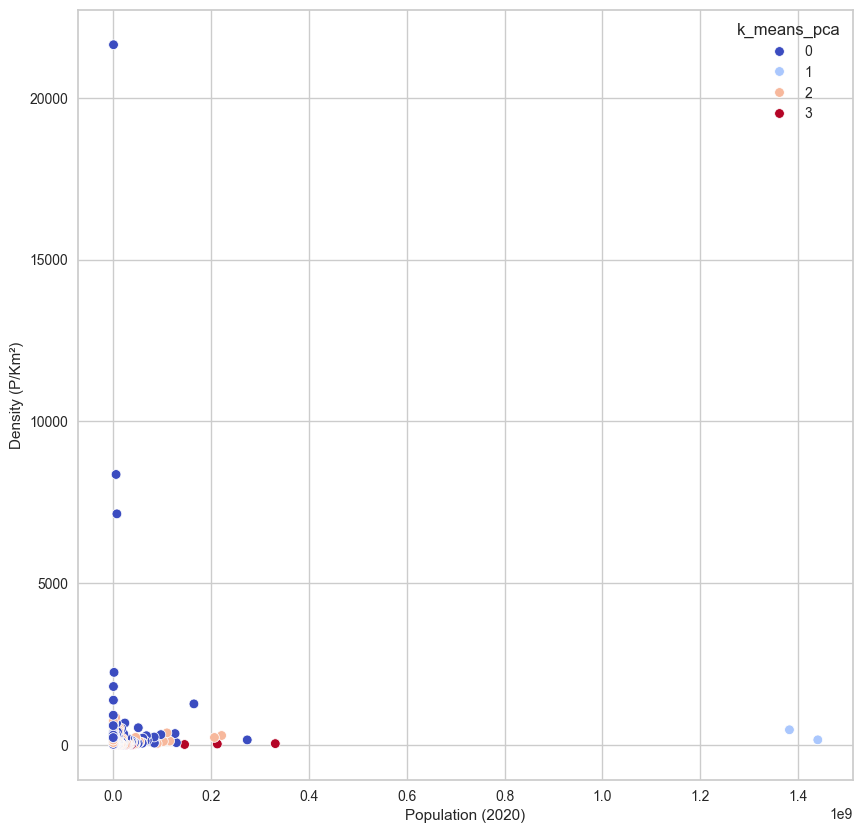

In [267]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='Population (2020)', y='Density (P/Km²)',hue='k_means_pca', palette='coolwarm')
plt.show()

In [268]:
df_country[df_country['k_means_pca']==3]

,Country (or dependency),Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
2,United States,331341050,1937734,36,9147420,954806.0,1.8,38,3,2,0,0,-1,-1
5,Brazil,212821986,1509890,25,8358140,21200.0,1.7,33,3,2,0,0,-1,-1
8,Russia,145945524,62206,9,16376870,182456.0,1.8,40,3,2,0,0,-1,-1
38,Canada,37799407,331107,4,9093510,242032.0,1.5,41,3,2,0,0,-1,-1
54,Australia,25550683,296686,3,7682300,158246.0,1.8,38,3,2,0,0,-1,-1


In [269]:
df_country[df_country['k_means_pca']==2]

,Country (or dependency),Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
4,Pakistan,221612785,4327022,287,770880,-233379.0,3.6,23,2,0,0,0,-1,-1
6,Nigeria,206984347,5175990,226,910770,-60000.0,5.4,18,2,0,0,0,-1,-1
11,Ethiopia,115434444,2884858,115,1000000,30000.0,4.3,19,2,0,0,0,0,0
12,Philippines,109830324,1464463,368,298170,-67152.0,2.6,26,2,1,0,0,0,0
13,Egypt,102659126,1946331,103,995450,-38033.0,3.3,25,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Sao Tome & Principe,219844,4103,228,960,-1680.0,4.4,19,2,1,0,0,0,0
187,Samoa,198643,1317,70,2830,-2803.0,3.9,22,2,1,0,0,0,0
192,Kiribati,119760,1843,147,810,-800.0,3.6,23,2,1,0,0,0,0
193,Micronesia,115231,1208,164,700,-600.0,3.1,24,2,1,0,0,0,0
